# Project One

Team Members:
Jose Alberto Alvarez
Jorge Alberto Muozcano Castro





Project Description 

# Initial Code

## Libraries

In [843]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [844]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [845]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

Time stamp        Date     device  energy  Total Cost
0    01/01/2020 00:00  01/01/2020  COMP_REF1  0.0000    0.000000
195  01/01/2020 16:00  01/01/2020  COMP_REF9  1.4900    2.474294
194  01/01/2020 16:00  01/01/2020     TUNEL1  0.1372    0.227834
193  01/01/2020 16:00  01/01/2020     TUNEL3  0.2318    0.384927
192  01/01/2020 16:00  01/01/2020  COMP_REF4  0.2772    0.460318

## Daily data 

In [846]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True,  format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

Date     device     energy   Total Cost  Product_A  Product_B  Temp  \
0 2019-03-01  COMP_REF1  6162.9256  8663.348872   357800.0   340036.2  20.0   
1 2019-03-01     TUNEL3  5078.9900  7288.358004   357800.0   340036.2  20.0   
2 2019-03-01     TUNEL2     0.0000     0.000000   357800.0   340036.2  20.0   
3 2019-03-01     TUNEL1     0.0000     0.000000   357800.0   340036.2  20.0   
4 2019-03-01  COMP_REF9     0.0000     0.000000   357800.0   340036.2  20.0   

    UV  PrecMM   Hum  Heat   DP  WChill  FLike  
0  6.0     0.0  33.0  20.0  1.0    20.0   20.0  
1  6.0     0.0  33.0  20.0  1.0    20.0   20.0  
2  6.0     0.0  33.0  20.0  1.0    20.0   20.0  
3  6.0     0.0  33.0  20.0  1.0    20.0   20.0  
4  6.0     0.0  33.0  20.0  1.0    20.0   20.0

# Analysis 

## What are the main climate variables that affect the factory production? 

In [847]:
# José/Jorge

In [848]:
# Graficar producto A y B VS Climate 

In [849]:
from scipy.stats import linregress
import scipy.stats as st

In [850]:
def scatter_plot(xvalues, yvalues, zvalues, xlabel, ylabel, zlabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    (slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(xvalues, zvalues)
    regress_values = xvalues * slope + intercept
    regress_values_z = xvalues * slope2 + intercept2
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq_2 = "z = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    plt.plot(xvalues,regress_values_z,"b-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.annotate(line_eq_2,(lim_x_annot,yvalues.max()/3*2),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.scatter(xvalues, zvalues, color="blue", alpha=0.5)
    plt.title(f"{xlabel} vs Production")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
    corr=round(st.pearsonr(xvalues,zvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,zvalues)
 
    print(f"""|{zlabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)

In [851]:
grouped_data = daily_data.groupby("Date")[["Product_A","Product_B","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
grouped_data

Product_A   Product_B  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date                                                                            
2019-03-01   357800.0  340036.200  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02   323960.0  314865.300  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03    78460.0   20084.850  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04   200500.0  394474.275  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05   303460.0  425879.850  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...               ...         ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25   468050.0  455990.900  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26   417640.0  431775.900  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27   377125.0  410920.426  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28   396095.0  397005.600  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29   415180.0  290293.200  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

            FLike  
Date               
2019-03-01   20.0  
2019-03-02   20.0  
2019-03-03   23.0  
2019-03-04   22.0  
2019-03-05   21.0  
...           ...  
2020-02-25   20.0  
2020-02-26   17.0  
2020-02-27   13.0  
2020-02-28   19.0  
2020-02-29   18.0  

[366 rows x 10 columns]

|Product A Vs Temperature| 
    The correlation is 0.01
    The LinregressResult(slope=297.4392562909667, intercept=290906.770292002, rvalue=0.008205678099851831, pvalue=0.8756787158859454, stderr=1899.8464293295829)
    
|Product B Vs Temperature| 
    The correlation is -0.01
    The LinregressResult(slope=-510.36422516070706, intercept=326970.64977782866, rvalue=-0.011358102223937645, pvalue=0.8285536110280032, stderr=2355.026205474438)
    


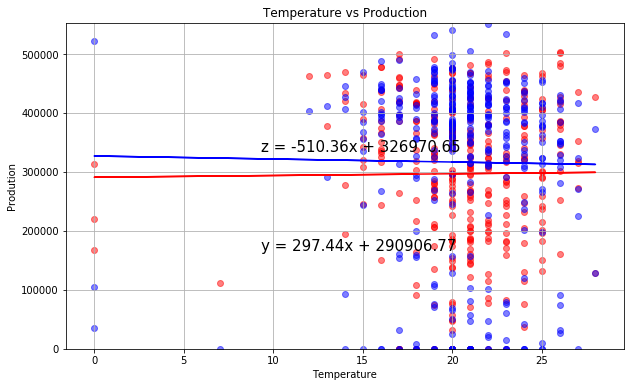

In [852]:
x_values = grouped_data["Temp"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Temperature"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs UV| 
    The correlation is 0.06
    The LinregressResult(slope=9292.532665648296, intercept=246730.56217308942, rvalue=0.06489530239119139, pvalue=0.215501324819531, stderr=7489.5154176354945)
    
|Product B Vs UV| 
    The correlation is -0.03
    The LinregressResult(slope=-5832.882822529161, intercept=348040.0156022685, rvalue=-0.03286031901194168, pvalue=0.5308731118498909, stderr=9298.784486651557)
    


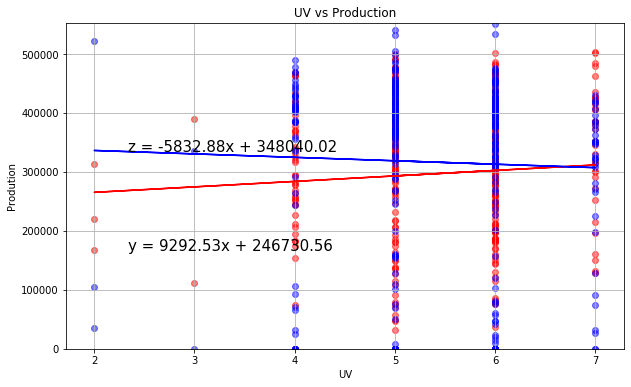

In [853]:
x_values = grouped_data["UV"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "UV"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Humidity| 
    The correlation is -0.33
    The LinregressResult(slope=-2350.058283162385, intercept=414857.4112576856, rvalue=-0.3253800667279515, pvalue=1.7944249291540392e-10, stderr=357.9618958233763)
    
|Product B Vs Humidity| 
    The correlation is 0.07
    The LinregressResult(slope=643.25577823461, intercept=284216.71599075594, rvalue=0.07184645860078613, pvalue=0.17019577671702457, stderr=468.0624913261332)
    


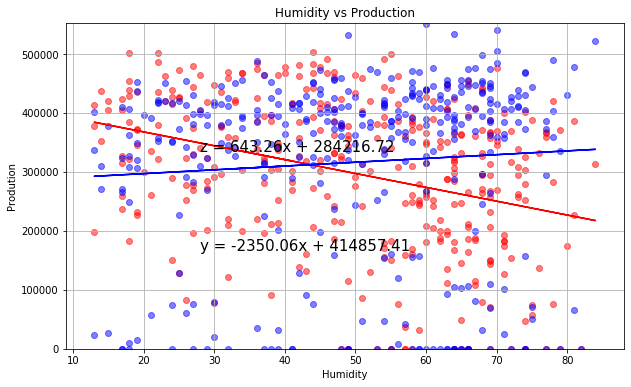

In [854]:
x_values = grouped_data["Hum"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Humidity"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Precipitation mm| 
    The correlation is -0.24
    The LinregressResult(slope=-7069.499104706693, intercept=310748.81183055637, rvalue=-0.24343625542986608, pvalue=2.448681657942203e-06, stderr=1476.3428286745614)
    
|Product B Vs Precipitation mm| 
    The correlation is -0.05
    The LinregressResult(slope=-1678.8071339866378, intercept=319727.6760300112, rvalue=-0.04663444157032843, pvalue=0.3736798143242378, stderr=1884.8230046645374)
    


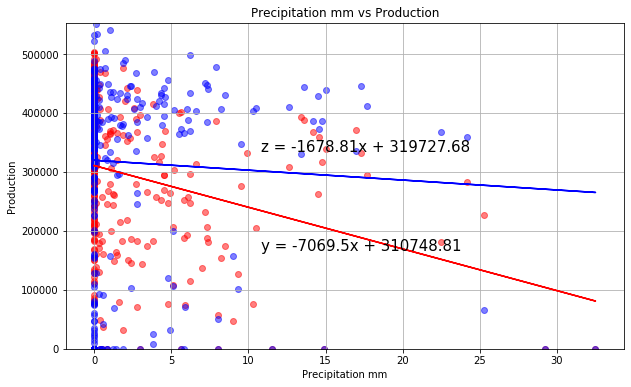

In [855]:
x_values = grouped_data["PrecMM"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Precipitation mm"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Heat| 
    The correlation is -0.04
    The LinregressResult(slope=-1880.4685239184669, intercept=335705.08200562355, rvalue=-0.04135264904516574, pvalue=0.43025578453621105, stderr=2381.4441032163722)
    
|Product B Vs Heat| 
    The correlation is -0.05
    The LinregressResult(slope=-2697.2670990409756, intercept=371947.353990657, rvalue=-0.04784874832049002, pvalue=0.36135189848928895, stderr=2951.2428805245877)
    


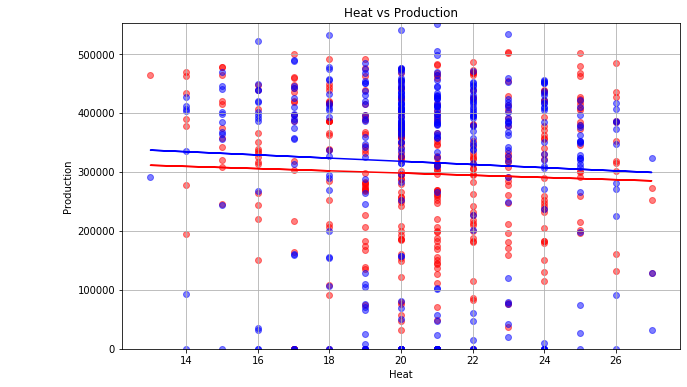

In [856]:
x_values = grouped_data["Heat"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Heat"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Dew Point| 
    The correlation is -0.36
    The LinregressResult(slope=-7828.341853242665, intercept=354541.81477969815, rvalue=-0.3578348807224887, pvalue=1.6963672250638098e-12, stderr=1070.7380966144765)
    
|Product B Vs Dew Point| 
    The correlation is 0.06
    The LinregressResult(slope=1546.618236732594, intercept=305106.143170563, rvalue=0.05703026318369269, pvalue=0.2765037744193915, stderr=1419.1217210870284)
    


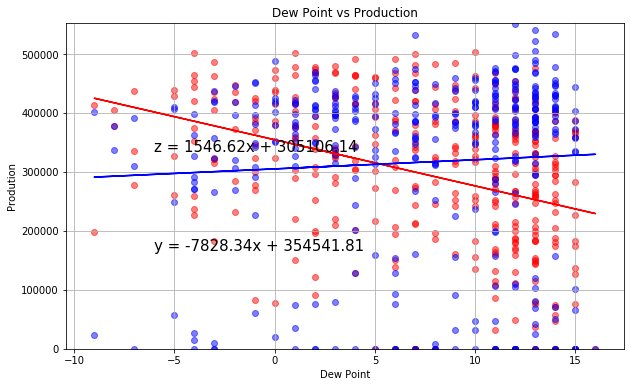

In [857]:
x_values = grouped_data["DP"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Dew Point"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Wind Chill| 
    The correlation is -0.01
    The LinregressResult(slope=-453.76866533259977, intercept=306225.1439729578, rvalue=-0.0104500236207811, pvalue=0.8420732126099256, stderr=2275.8457541550083)
    
|Product B Vs Wind Chill| 
    The correlation is -0.07
    The LinregressResult(slope=-3528.6521214056606, intercept=387996.652807947, rvalue=-0.06555426818916132, pvalue=0.21086763858682067, stderr=2815.2826784391477)
    


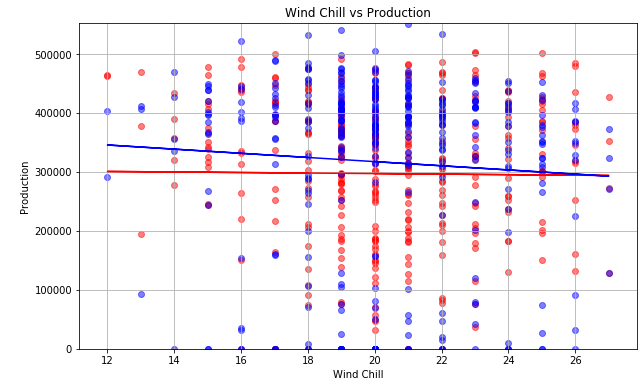

In [858]:
x_values = grouped_data["WChill"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Wind Chill"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Feel Like| 
    The correlation is -0.02
    The LinregressResult(slope=-1018.5770686754256, intercept=317693.5690655293, rvalue=-0.02351881515706643, pvalue=0.6538181017137703, stderr=2269.3820690336047)
    
|Product B Vs Feel Like| 
    The correlation is -0.06
    The LinregressResult(slope=-3488.45621278387, intercept=387248.5810795984, rvalue=-0.0649776768057967, pvalue=0.2149181257041976, stderr=2808.0164435206725)
    


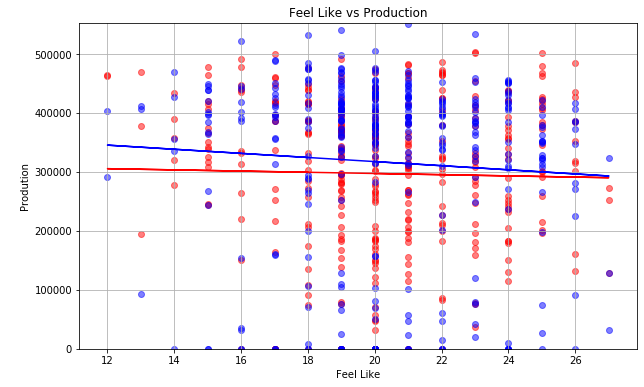

In [859]:
x_values = grouped_data["FLike"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Feel Like"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

## What are the main climate variables that affect the energy consumption?

In [860]:
# José/Jorge

In [861]:
# Graficar devices VS climate

In [1011]:
# Retirar outliers
energy_efficiency = daily_data.groupby("Date")[["Product_A","Product_B","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
energy_efficiency["Total Consumption"] = daily_data.groupby("Date")[["energy",]].sum()
energy_efficiency["Efficiency"] = (energy_efficiency["Product_A"]+energy_efficiency["Product_B"])/energy_efficiency["Total Consumption"]
energy_efficiency

Product_A   Product_B  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date                                                                            
2019-03-01   357800.0  340036.200  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02   323960.0  314865.300  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03    78460.0   20084.850  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04   200500.0  394474.275  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05   303460.0  425879.850  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...               ...         ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25   468050.0  455990.900  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26   417640.0  431775.900  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27   377125.0  410920.426  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28   396095.0  397005.600  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29   415180.0  290293.200  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

            FLike  Total Consumption  Efficiency  
Date                                              
2019-03-01   20.0         29874.3831   23.359016  
2019-03-02   20.0         27159.7770   23.521007  
2019-03-03   23.0         12241.1578    8.050288  
2019-03-04   22.0         18871.5488   31.527581  
2019-03-05   21.0         25744.3528   28.330091  
...           ...                ...         ...  
2020-02-25   20.0         40940.1844   22.570511  
2020-02-26   17.0         39588.6127   21.456066  
2020-02-27   13.0         35256.1534   22.351997  
2020-02-28   19.0         35640.6443   22.252701  
2020-02-29   18.0         37721.9749   18.701916  

[366 rows x 12 columns]

In [863]:

def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = (xvalues.max()/3)+xvalues.min()
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.title(f"{xlabel} vs Efficiency")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)

|Energy Efficiency Vs Temperature| 
    The correlation is -0.02
    The LinregressResult(slope=-0.04574646688549234, intercept=18.898827378280085, rvalue=-0.023428956269556867, pvalue=0.655055265150298, stderr=0.10231391336496007)
    


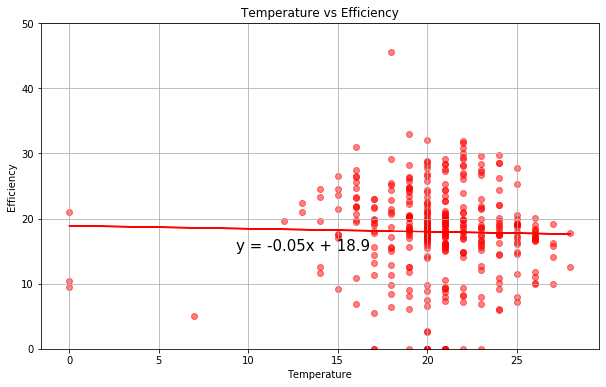

In [864]:
x_values = energy_efficiency["Temp"]
y_values = energy_efficiency["Efficiency"]
x_label = "Temperature"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

|Energy Efficiency Vs UV| 
    The correlation is 0.0
    The LinregressResult(slope=0.02854658723504242, intercept=17.80301472410724, rvalue=0.0037009443405845313, pvalue=0.9437469271607017, stderr=0.4042853234634105)
    


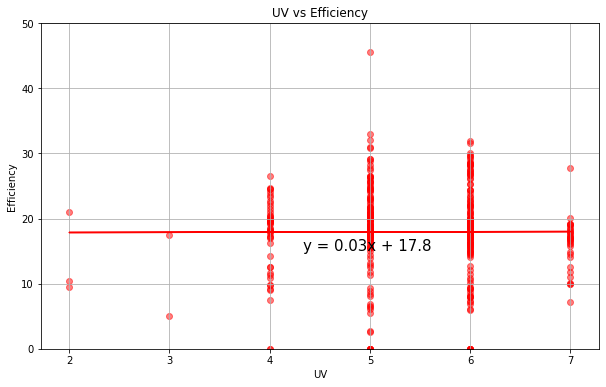

In [865]:
x_values = energy_efficiency["UV"]
y_values = energy_efficiency["Efficiency"]
x_label = "UV"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

|Energy Efficiency Vs PrecMM| 
    The correlation is -0.17
    The LinregressResult(slope=-0.27130810775201925, intercept=18.48412966689318, rvalue=-0.17343573365624151, pvalue=0.0008623771430570446, stderr=0.08074980206932673)
    


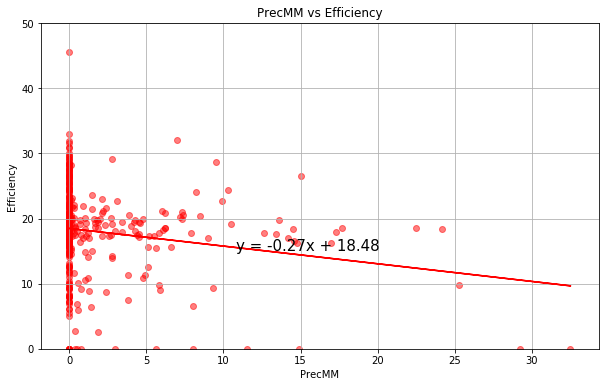

In [866]:
x_values = energy_efficiency["PrecMM"]
y_values = energy_efficiency["Efficiency"]
x_label = "PrecMM"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

|Energy Efficiency Vs Hum| 
    The correlation is -0.25
    The LinregressResult(slope=-0.09586481247774883, intercept=22.764123912882617, rvalue=-0.24640568976927343, pvalue=1.8270918899130007e-06, stderr=0.019763156973928053)
    


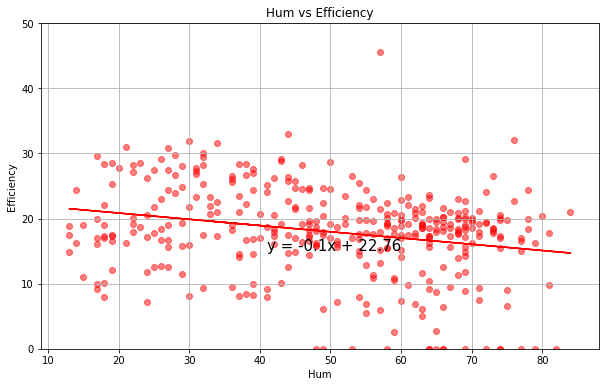

In [867]:
x_values = energy_efficiency["Hum"]
y_values = energy_efficiency["Efficiency"]
x_label = "Hum"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

|Energy Efficiency Vs Heat| 
    The correlation is -0.07
    The LinregressResult(slope=-0.18353428435506325, intercept=21.7325144015322, rvalue=-0.07492619256610036, pvalue=0.15256477000736526, stderr=0.1280295920654364)
    


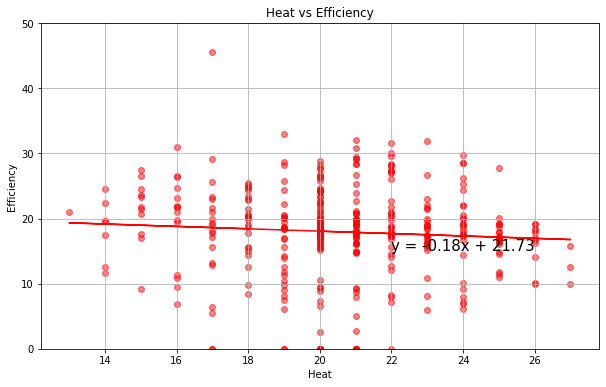

In [868]:
x_values = energy_efficiency["Heat"]
y_values = energy_efficiency["Efficiency"]
x_label = "Heat"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

|Energy Efficiency Vs DP| 
    The correlation is -0.3
    The LinregressResult(slope=-0.35159907299528903, intercept=20.540721545410385, rvalue=-0.29835945500725597, pvalue=5.830500895367562e-09, stderr=0.05895383144927301)
    


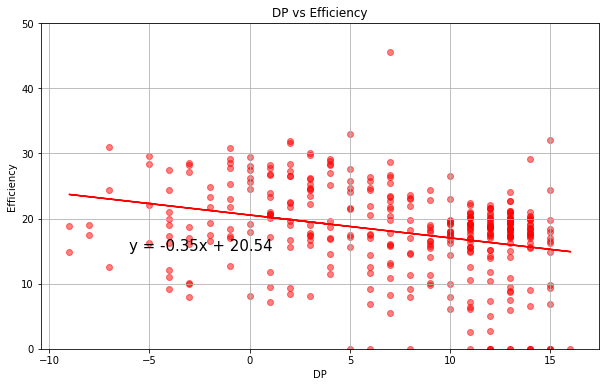

In [869]:
x_values = energy_efficiency["DP"]
y_values = energy_efficiency["Efficiency"]
x_label = "DP"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

|Energy Efficiency Vs Dew Point| 
    The correlation is -0.05
    The LinregressResult(slope=-0.1284991823683331, intercept=20.562266700345717, rvalue=-0.054936669606265594, pvalue=0.29454785707705905, stderr=0.1224139734745525)
    


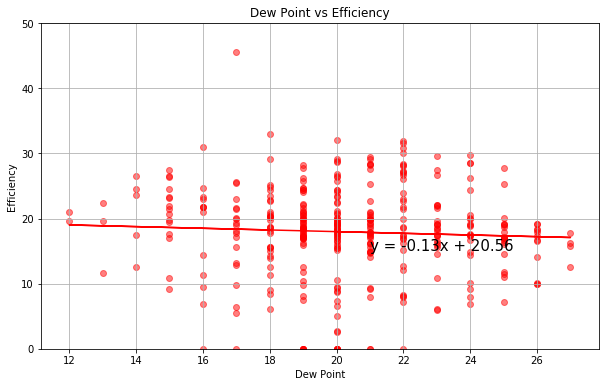

In [870]:
x_values = energy_efficiency["WChill"]
y_values = energy_efficiency["Efficiency"]
x_label = "Dew Point"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

|Energy Efficiency Vs FLike| 
    The correlation is -0.06
    The LinregressResult(slope=-0.13591288069035398, intercept=20.71514543809409, rvalue=-0.05825877598835398, pvalue=0.2662723584078103, stderr=0.12207038097859703)
    


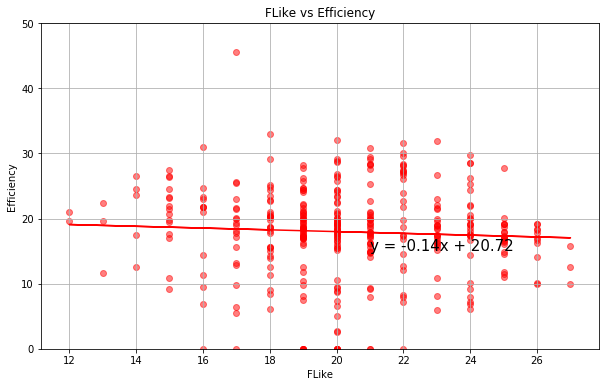

In [871]:
x_values = energy_efficiency["FLike"]
y_values = energy_efficiency["Efficiency"]
x_label = "FLike"
y_label = "Energy Efficiency"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Efficiency")
plt.show()

In [1020]:
comp1 =  daily_data.loc[ daily_data["device"] == "COMP_REF1", :]
comp1_efficiency = comp1.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp1_efficiency["Total Consumption"] = comp1_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp1_efficiency["Efficiency"] = (comp1_efficiency["Product_A"]+comp1_efficiency["Product_B"])/comp1_efficiency["Total Consumption"]
devices_data = comp1_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                             
2019-03-01 COMP_REF1  6162.9256  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF1  5867.5939  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF1  2366.0853  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF1  4607.5877  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF1  5112.1222  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                         ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF1     0.0005  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF1     0.0843  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF1     0.0030  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF1     0.0000  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF1     0.0000  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF1   20.0   357800.0  340036.200          6162.9256   
2019-03-02 COMP_REF1   20.0   323960.0  314865.300          5867.5939   
2019-03-03 COMP_REF1   23.0    78460.0   20084.850          2366.0853   
2019-03-04 COMP_REF1   22.0   200500.0  394474.275          4607.5877   
2019-03-05 COMP_REF1   21.0   303460.0  425879.850          5112.1222   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF1   20.0   468050.0  455990.900             0.0005   
2020-02-26 COMP_REF1   17.0   417640.0  431775.900             0.0843   
2020-02-27 COMP_REF1   13.0   377125.0  410920.426             0.0030   
2020-02-28 COMP_REF1   19.0   396095.0  397005.600             0.0000   
2020-02-29 COMP_REF1   18.0   415180.0  290293.200             0.0000   

                        Efficiency  
Date       device                   
2019-03-01 COMP_REF1  1.132313e+02  
2019-03-02 COMP_REF1  1.088735e+02  
2019-03-03 COMP_REF1  4.164890e+01  
2019-03-04 COMP_REF1  1.291292e+02  
2019-03-05 COMP_REF1  1.426687e+02  
...                            ...  
2020-02-25 COMP_REF1  1.848082e+09  
2020-02-26 COMP_REF1  1.007611e+07  
2020-02-27 COMP_REF1  2.626818e+08  
2020-02-28 COMP_REF1           inf  
2020-02-29 COMP_REF1           inf  

[366 rows x 13 columns]

In [873]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF1: Temperature| 
    The correlation is 0.39
    The LinregressResult(slope=250.4828991702507, intercept=-1689.6501233638205, rvalue=0.3864931486828209, pvalue=1.7361843543043095e-14, stderr=31.329550385103822)
    


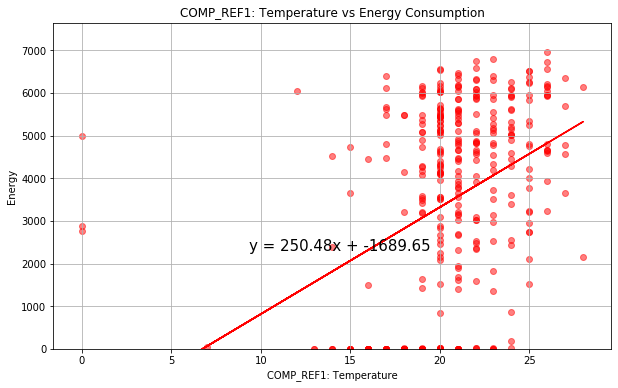

In [874]:
x_values = devices_data["Temp"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF1: UV| 
    The correlation is 0.3
    The LinregressResult(slope=757.382661915389, intercept=-634.9734556130757, rvalue=0.29582988985238584, pvalue=7.934248702394142e-09, stderr=128.1844680013485)
    


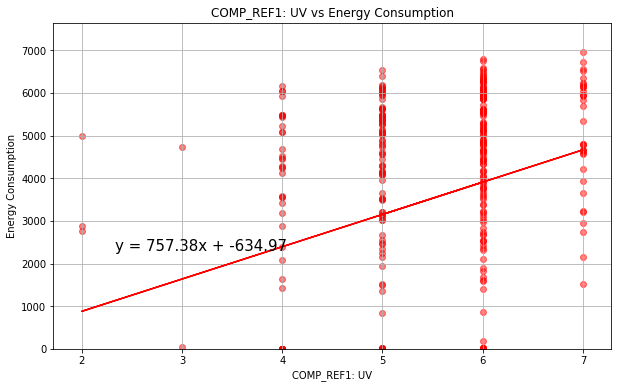

In [875]:
x_values = devices_data["UV"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Precipitation MM| 
    The correlation is -0.03
    The LinregressResult(slope=-14.036732591082519, intercept=3491.6570036412704, rvalue=-0.02703399134533773, pvalue=0.6061926357987214, stderr=27.20485446575832)
    


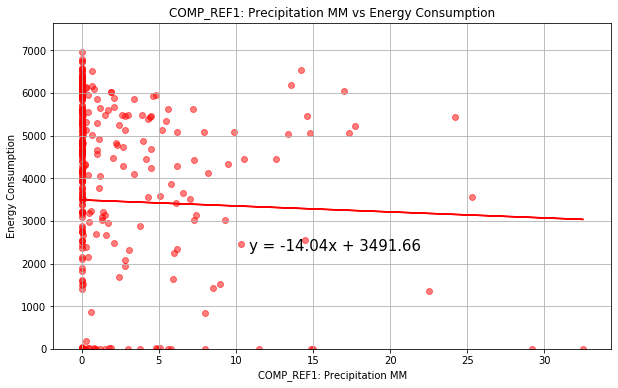

In [876]:
x_values = devices_data["PrecMM"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Humidity| 
    The correlation is -0.14
    The LinregressResult(slope=-17.52598931904319, intercept=4343.153547797163, rvalue=-0.13571954098573294, pvalue=0.009332571864696501, stderr=6.705827303694501)
    


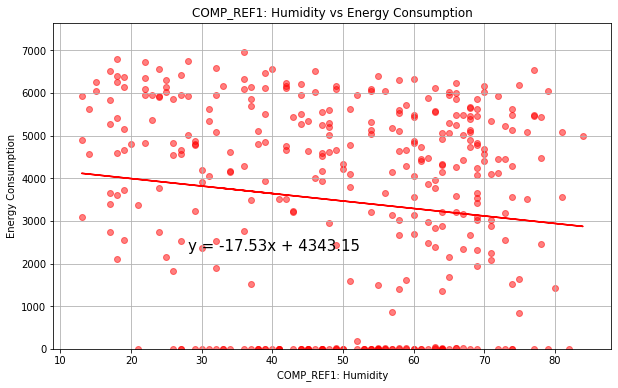

In [877]:
x_values = devices_data["Hum"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Heat| 
    The correlation is 0.42
    The LinregressResult(slope=343.0189370800804, intercept=-3590.9065296143303, rvalue=0.4218935568270983, pvalue=3.146309126635151e-17, stderr=38.636872088988945)
    


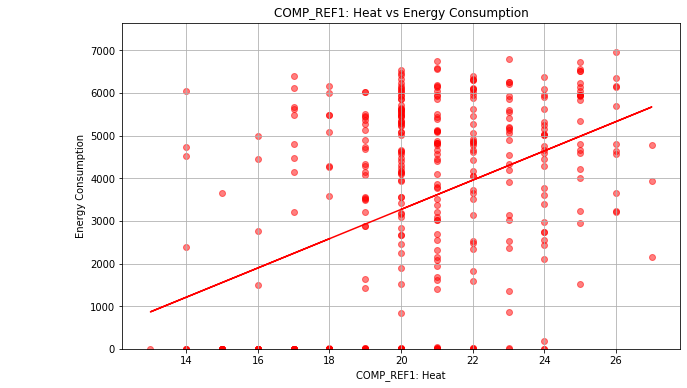

In [878]:
x_values = devices_data["Heat"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Dew Point| 
    The correlation is -0.02
    The LinregressResult(slope=-8.480358631327501, intercept=3526.717084315955, rvalue=-0.021680766754204363, pvalue=0.6793082505329673, stderr=20.496834500001764)
    


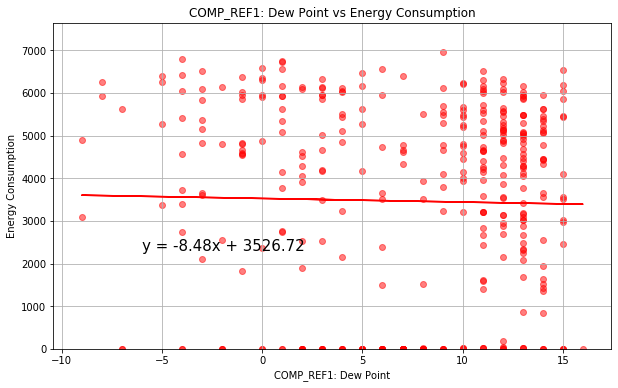

In [879]:
x_values = devices_data["DP"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Wind Chill| 
    The correlation is 0.43
    The LinregressResult(slope=333.5799696986747, intercept=-3297.4181057225883, rvalue=0.429665282077171, pvalue=7.098216457018653e-18, stderr=36.74524098783027)
    


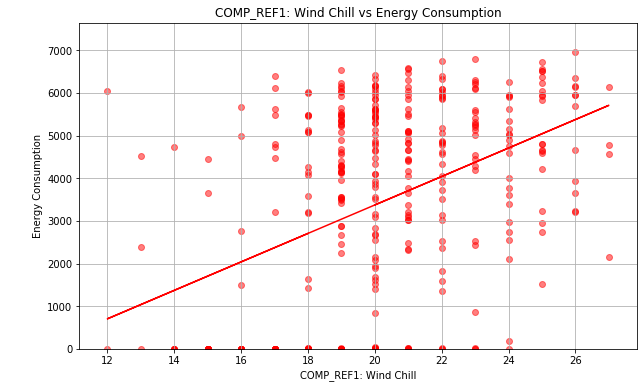

In [880]:
x_values = devices_data["WChill"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF1: Feel Like| 
    The correlation is 0.42
    The LinregressResult(slope=325.4159557722367, intercept=-3138.1533307776776, rvalue=0.42025018804923586, pvalue=4.289552178436829e-17, stderr=36.82841014548484)
    


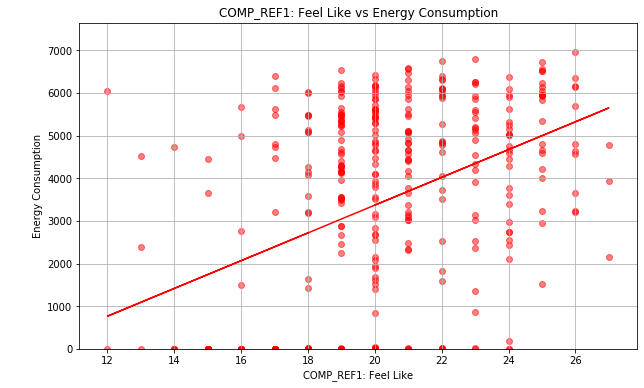

In [881]:
x_values = devices_data["FLike"]
y_values = devices_data["energy"]
x_label = "COMP_REF1: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B03FBCCC0>,
      dtype=object)

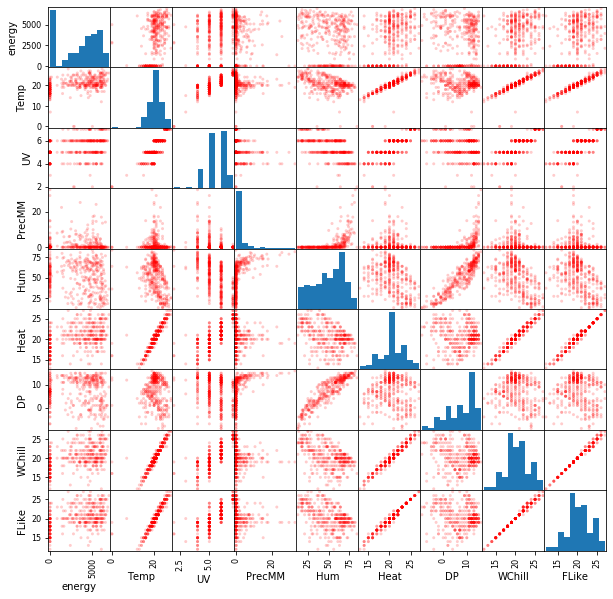

In [882]:
pd.plotting.scatter_matrix(devices_data.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "red")

In [883]:
comp2 =  daily_data.loc[ daily_data["device"] == "COMP_REF2", :]
comp2_efficiency = comp2.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp2_efficiency["Total Consumption"] = comp2_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp2_efficiency["Efficiency"] = (comp2_efficiency["Product_A"]+comp2_efficiency["Product_B"])/comp2_efficiency["Total Consumption"]
devices_data2 = comp2_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data2

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                             
2019-03-01 COMP_REF2  6476.8864  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF2  6084.0749  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF2  2564.2945  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF2  4888.2142  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF2  5340.9948  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                         ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF2  5730.2421  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF2  5452.7704  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF2  5992.0897  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF2  5526.3986  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF2  5831.8796  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF2   20.0   357800.0  340036.200          6476.8864   
2019-03-02 COMP_REF2   20.0   323960.0  314865.300          6084.0749   
2019-03-03 COMP_REF2   23.0    78460.0   20084.850          2564.2945   
2019-03-04 COMP_REF2   22.0   200500.0  394474.275          4888.2142   
2019-03-05 COMP_REF2   21.0   303460.0  425879.850          5340.9948   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF2   20.0   468050.0  455990.900          5730.2421   
2020-02-26 COMP_REF2   17.0   417640.0  431775.900          5452.7704   
2020-02-27 COMP_REF2   13.0   377125.0  410920.426          5992.0897   
2020-02-28 COMP_REF2   19.0   396095.0  397005.600          5526.3986   
2020-02-29 COMP_REF2   18.0   415180.0  290293.200          5831.8796   

                      Efficiency  
Date       device                 
2019-03-01 COMP_REF2  107.742541  
2019-03-02 COMP_REF2  104.999578  
2019-03-03 COMP_REF2   38.429615  
2019-03-04 COMP_REF2  121.716081  
2019-03-05 COMP_REF2  136.555057  
...                          ...  
2020-02-25 COMP_REF2  161.256869  
2020-02-26 COMP_REF2  155.776942  
2020-02-27 COMP_REF2  131.514291  
2020-02-28 COMP_REF2  143.511291  
2020-02-29 COMP_REF2  120.968410  

[366 rows x 13 columns]

In [884]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="blue", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF2: Temperature| 
    The correlation is 0.07
    The LinregressResult(slope=36.91466303306399, intercept=3992.9258308688395, rvalue=0.07237532091531501, pvalue=0.16706455492309422, stderr=26.663506754098236)
    


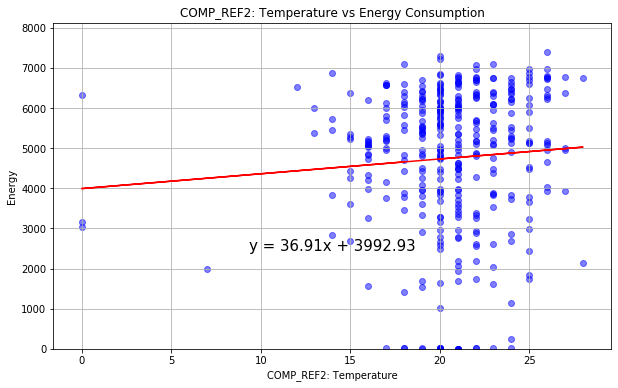

In [885]:
x_values = devices_data2["Temp"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF2: UV| 
    The correlation is 0.09
    The LinregressResult(slope=176.16736623645068, intercept=3798.982592583583, rvalue=0.08743393612855554, pvalue=0.09488221676818223, stderr=105.20305170929495)
    


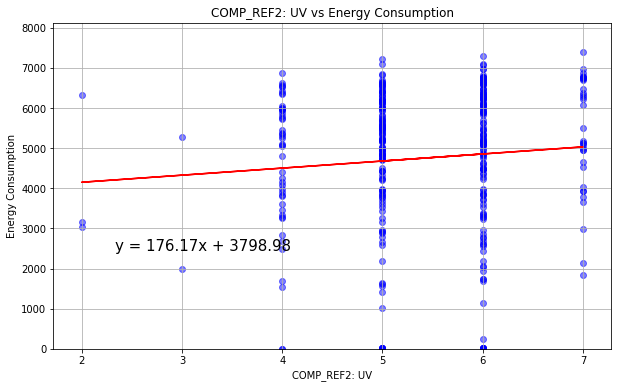

In [886]:
x_values = devices_data2["UV"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Precipitation MM| 
    The correlation is -0.19
    The LinregressResult(slope=-76.76394123998817, intercept=4901.498047149967, rvalue=-0.1878578224957713, pvalue=0.0003016675782588847, stderr=21.03660015204468)
    


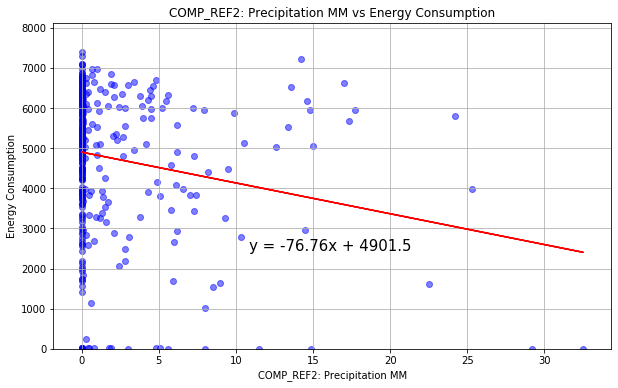

In [887]:
x_values = devices_data2["PrecMM"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Humidity| 
    The correlation is -0.21
    The LinregressResult(slope=-21.34325091097763, intercept=5822.637100730466, rvalue=-0.21001401855770319, pvalue=5.136898876535001e-05, stderr=5.207946165535617)
    


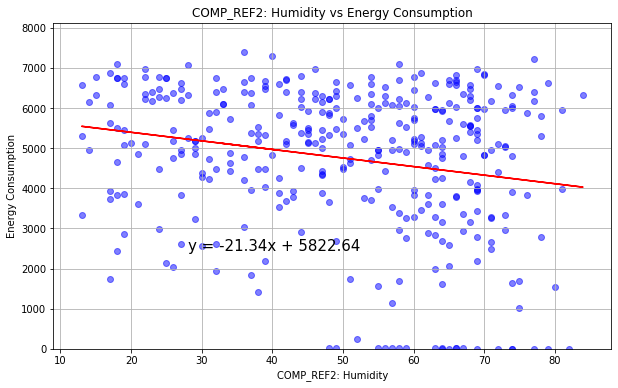

In [888]:
x_values = devices_data2["Hum"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Heat| 
    The correlation is 0.04
    The LinregressResult(slope=24.77091529257871, intercept=4243.004729719857, rvalue=0.03871281265762771, pvalue=0.46029382042696587, stderr=33.51281875253406)
    


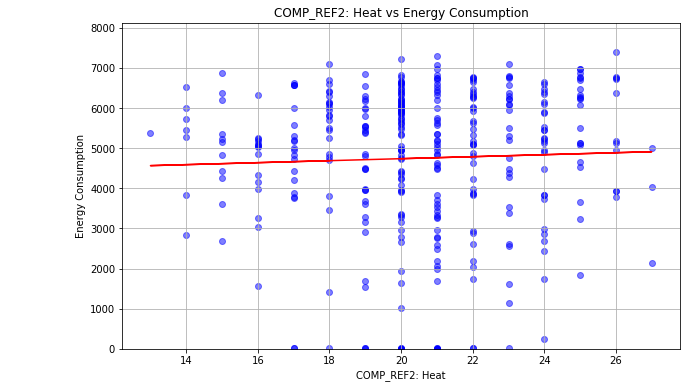

In [889]:
x_values = devices_data2["Heat"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()


|Energy Consumption Vs COMP_REF2: Dew Point| 
    The correlation is -0.2
    The LinregressResult(slope=-63.00401269810031, intercept=5215.390632637136, rvalue=-0.20467109094621927, pvalue=8.012547954853052e-05, stderr=15.79314572530391)
    


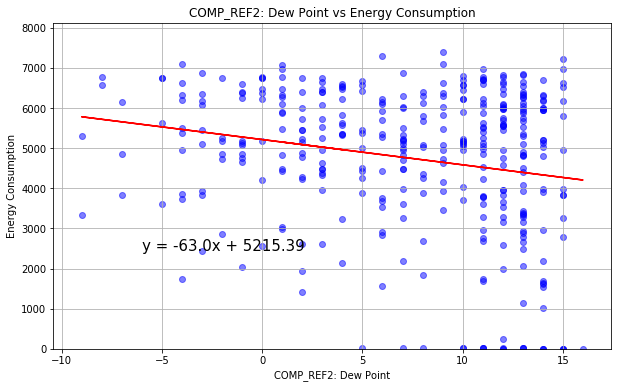

In [890]:
x_values = devices_data2["DP"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Wind Chill| 
    The correlation is 0.06
    The LinregressResult(slope=37.82887249667536, intercept=3985.690645757283, rvalue=0.06191296047936224, pvalue=0.23738556939356129, stderr=31.963708610182966)
    


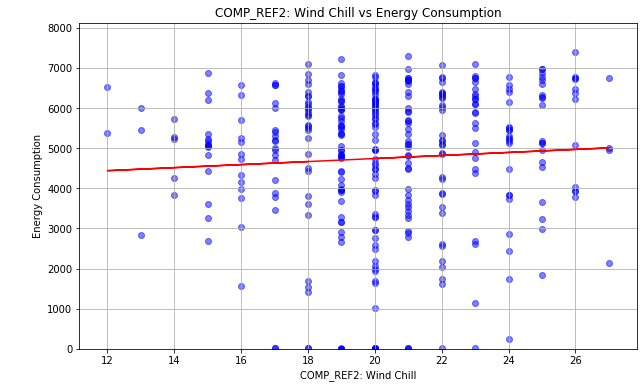

In [891]:
x_values = devices_data2["WChill"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF2: Feel Like| 
    The correlation is 0.05
    The LinregressResult(slope=31.8736196202828, intercept=4105.796945627814, rvalue=0.05230320886276579, pvalue=0.3183377151787274, stderr=31.897563590392448)
    


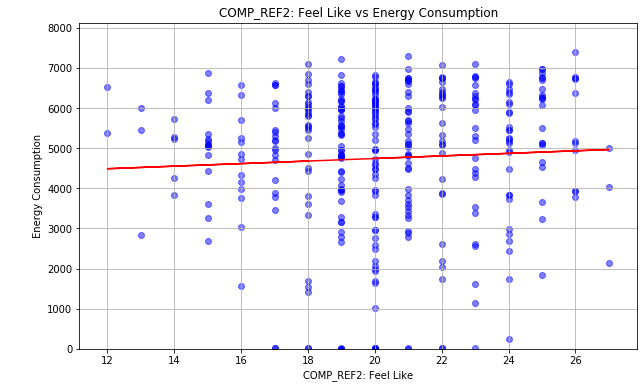

In [892]:
x_values = devices_data2["FLike"]
y_values = devices_data2["energy"]
x_label = "COMP_REF2: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B07BBE898>,
      dtype=object)

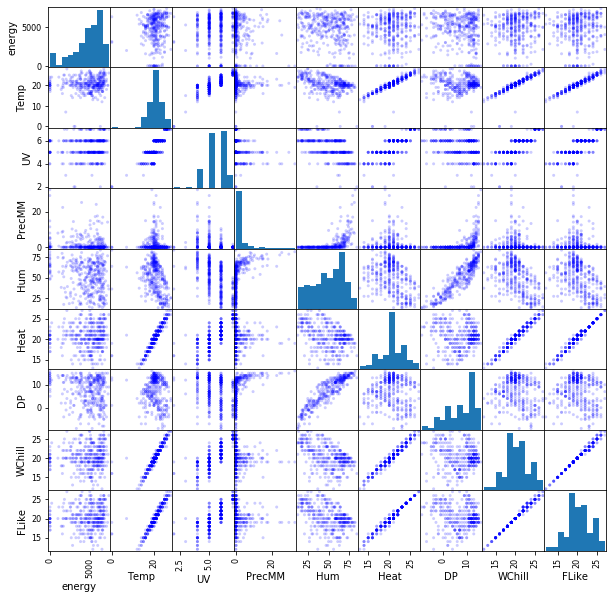

In [893]:
pd.plotting.scatter_matrix(devices_data2.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "blue")

In [894]:
comp4 =  daily_data.loc[ daily_data["device"] == "COMP_REF4", :]
comp4_efficiency = comp4.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp4_efficiency["Total Consumption"] = comp4_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp4_efficiency["Efficiency"] = (comp4_efficiency["Product_A"]+comp4_efficiency["Product_B"])/comp4_efficiency["Total Consumption"]
devices_data4 = comp4_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data4

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                          
2019-03-01 COMP_REF4  0.0000  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF4  0.0000  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF4  0.0000  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF4  0.0000  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF4  0.0000  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                      ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF4  6.8646  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF4  6.8006  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF4  6.8790  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF4  6.8068  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF4  6.8297  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF4   20.0   357800.0  340036.200             0.0000   
2019-03-02 COMP_REF4   20.0   323960.0  314865.300             0.0000   
2019-03-03 COMP_REF4   23.0    78460.0   20084.850             0.0000   
2019-03-04 COMP_REF4   22.0   200500.0  394474.275             0.0000   
2019-03-05 COMP_REF4   21.0   303460.0  425879.850             0.0000   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF4   20.0   468050.0  455990.900             6.8646   
2020-02-26 COMP_REF4   17.0   417640.0  431775.900             6.8006   
2020-02-27 COMP_REF4   13.0   377125.0  410920.426             6.8790   
2020-02-28 COMP_REF4   19.0   396095.0  397005.600             6.8068   
2020-02-29 COMP_REF4   18.0   415180.0  290293.200             6.8297   

                        Efficiency  
Date       device                   
2019-03-01 COMP_REF4           inf  
2019-03-02 COMP_REF4           inf  
2019-03-03 COMP_REF4           inf  
2019-03-04 COMP_REF4           inf  
2019-03-05 COMP_REF4           inf  
...                            ...  
2020-02-25 COMP_REF4  1.346096e+05  
2020-02-26 COMP_REF4  1.249031e+05  
2020-02-27 COMP_REF4  1.145581e+05  
2020-02-28 COMP_REF4  1.165159e+05  
2020-02-29 COMP_REF4  1.032949e+05  

[366 rows x 13 columns]

In [895]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="green", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF4: Temperature| 
    The correlation is -0.07
    The LinregressResult(slope=-35.47155501949818, intercept=2537.021205879347, rvalue=-0.07175971124195947, pvalue=0.17071353387711805, stderr=25.842098307085244)
    


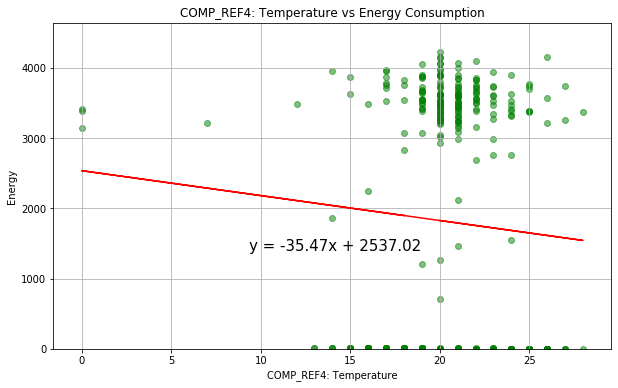

In [896]:
x_values = devices_data4["Temp"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF4: UV| 
    The correlation is -0.17
    The LinregressResult(slope=-332.55902115069756, intercept=3607.139074862109, rvalue=-0.17030686810165924, pvalue=0.0010718899464109116, stderr=100.85431948670227)
    


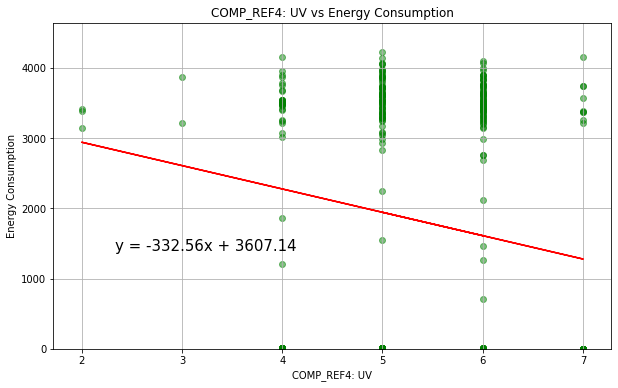

In [897]:
x_values = devices_data4["UV"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Precipitation MM| 
    The correlation is 0.21
    The LinregressResult(slope=82.9352006991657, intercept=1646.1647921401986, rvalue=0.20942078366350958, pvalue=5.3998442435306416e-05, stderr=20.296905887521547)
    


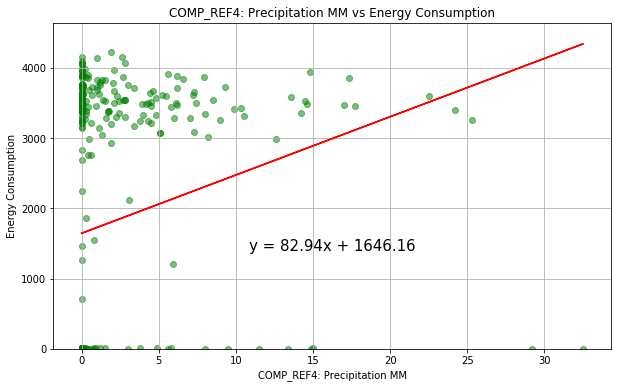

In [898]:
x_values = devices_data4["PrecMM"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Humidity| 
    The correlation is 0.61
    The LinregressResult(slope=59.722310657018, intercept=-1187.2968370681344, rvalue=0.6063636773726384, pvalue=4.0480516760659365e-38, stderr=4.1050859349671525)
    


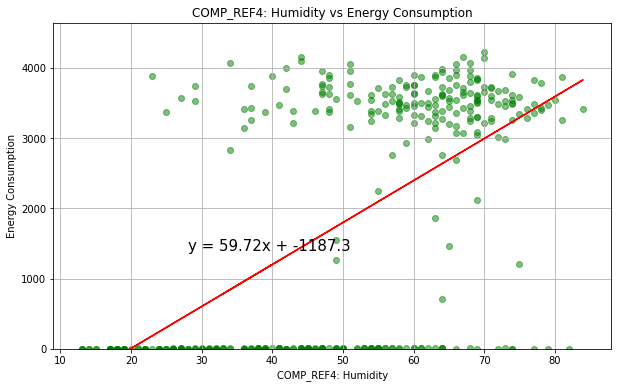

In [899]:
x_values = devices_data4["Hum"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Heat| 
    The correlation is -0.02
    The LinregressResult(slope=-14.442791298836951, intercept=2104.204408190286, rvalue=-0.023290170511868255, pvalue=0.6569678996419184, stderr=32.49450728599861)
    


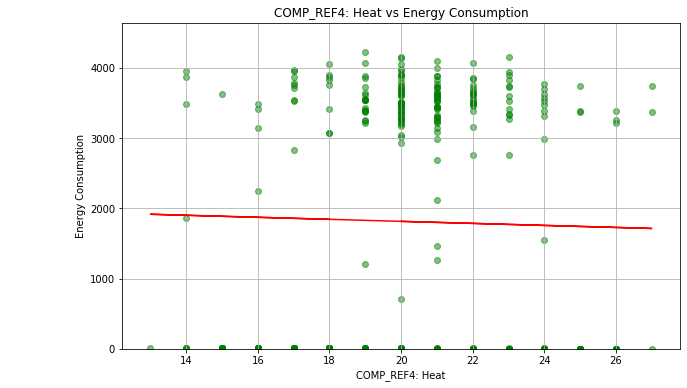

In [900]:
x_values = devices_data4["Heat"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Dew Point| 
    The correlation is 0.65
    The LinregressResult(slope=194.31635191237604, intercept=379.49948144158725, rvalue=0.6513381305105873, pvalue=1.4772471174210568e-45, stderr=11.86512683692766)
    


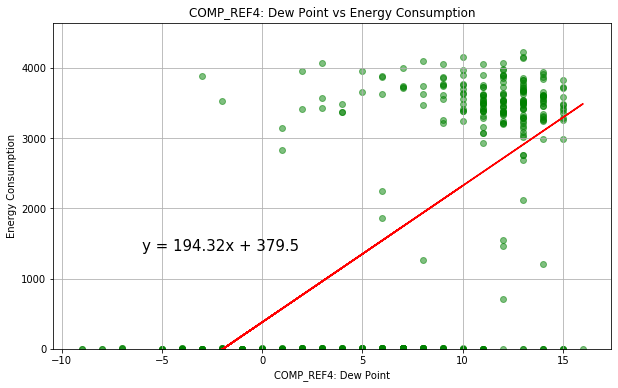

In [901]:
x_values = devices_data4["DP"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Wind Chill| 
    The correlation is -0.09
    The LinregressResult(slope=-53.790268087957315, intercept=2897.4958454769276, rvalue=-0.09083866508463855, pvalue=0.08265387037243387, stderr=30.908861887719087)
    


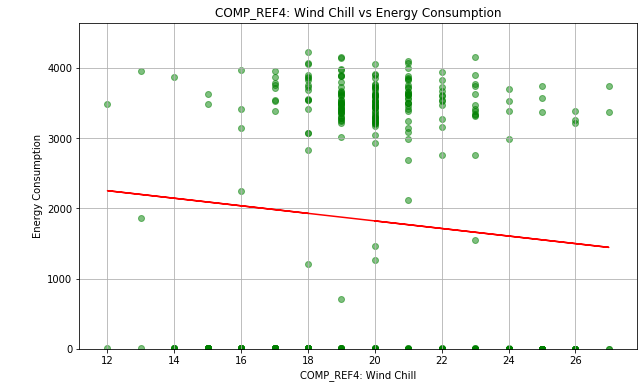

In [902]:
x_values = devices_data4["WChill"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF4: Feel Like| 
    The correlation is -0.07
    The LinregressResult(slope=-43.83064429051967, intercept=2696.447663938249, rvalue=-0.07421362818655766, pvalue=0.15651562194199728, stderr=30.87053949780253)
    


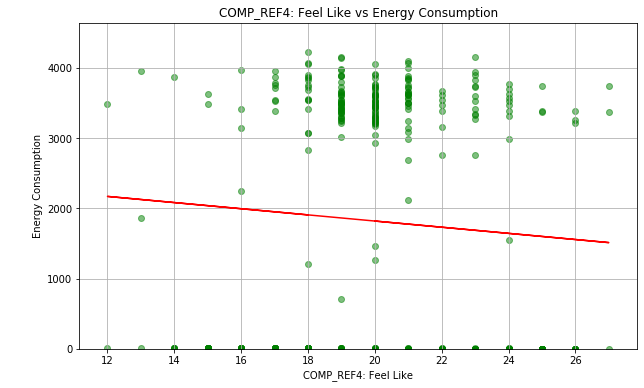

In [903]:
x_values = devices_data4["FLike"]
y_values = devices_data4["energy"]
x_label = "COMP_REF4: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0A7ECD68>,
      dtype=object)

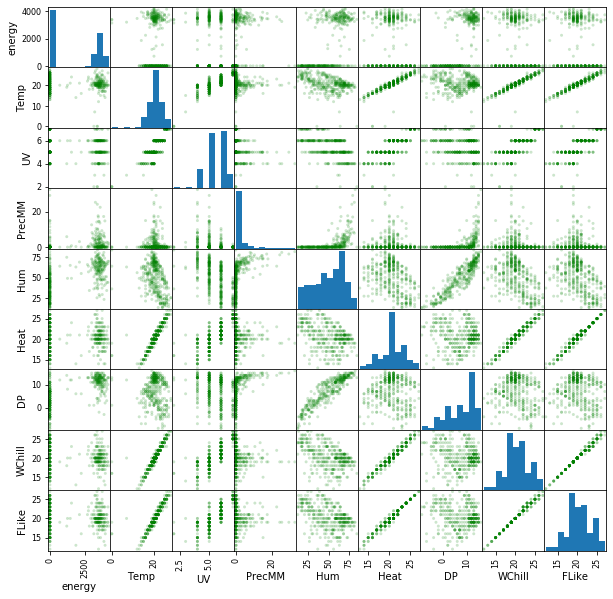

In [904]:
pd.plotting.scatter_matrix(devices_data4.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "green")

In [905]:
comp6 =  daily_data.loc[ daily_data["device"] == "COMP_REF6", :]
comp6_efficiency = comp2.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp6_efficiency["Total Consumption"] = comp6_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp6_efficiency["Efficiency"] = (comp6_efficiency["Product_A"]+comp6_efficiency["Product_B"])/comp6_efficiency["Total Consumption"]
devices_data6 = comp6_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data6

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                             
2019-03-01 COMP_REF2  6476.8864  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF2  6084.0749  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF2  2564.2945  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF2  4888.2142  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF2  5340.9948  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                         ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF2  5730.2421  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF2  5452.7704  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF2  5992.0897  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF2  5526.3986  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF2  5831.8796  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF2   20.0   357800.0  340036.200          6476.8864   
2019-03-02 COMP_REF2   20.0   323960.0  314865.300          6084.0749   
2019-03-03 COMP_REF2   23.0    78460.0   20084.850          2564.2945   
2019-03-04 COMP_REF2   22.0   200500.0  394474.275          4888.2142   
2019-03-05 COMP_REF2   21.0   303460.0  425879.850          5340.9948   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF2   20.0   468050.0  455990.900          5730.2421   
2020-02-26 COMP_REF2   17.0   417640.0  431775.900          5452.7704   
2020-02-27 COMP_REF2   13.0   377125.0  410920.426          5992.0897   
2020-02-28 COMP_REF2   19.0   396095.0  397005.600          5526.3986   
2020-02-29 COMP_REF2   18.0   415180.0  290293.200          5831.8796   

                      Efficiency  
Date       device                 
2019-03-01 COMP_REF2  107.742541  
2019-03-02 COMP_REF2  104.999578  
2019-03-03 COMP_REF2   38.429615  
2019-03-04 COMP_REF2  121.716081  
2019-03-05 COMP_REF2  136.555057  
...                          ...  
2020-02-25 COMP_REF2  161.256869  
2020-02-26 COMP_REF2  155.776942  
2020-02-27 COMP_REF2  131.514291  
2020-02-28 COMP_REF2  143.511291  
2020-02-29 COMP_REF2  120.968410  

[366 rows x 13 columns]

In [906]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="purple", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF6: Temperature| 
    The correlation is 0.07
    The LinregressResult(slope=36.91466303306399, intercept=3992.9258308688395, rvalue=0.07237532091531501, pvalue=0.16706455492309422, stderr=26.663506754098236)
    


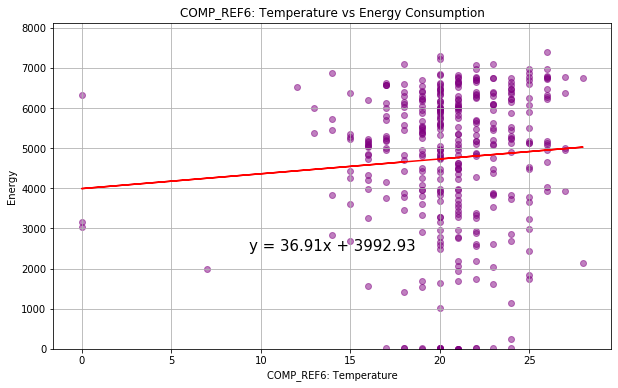

In [907]:
x_values = devices_data6["Temp"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF4: UV| 
    The correlation is 0.09
    The LinregressResult(slope=176.16736623645068, intercept=3798.982592583583, rvalue=0.08743393612855554, pvalue=0.09488221676818223, stderr=105.20305170929495)
    


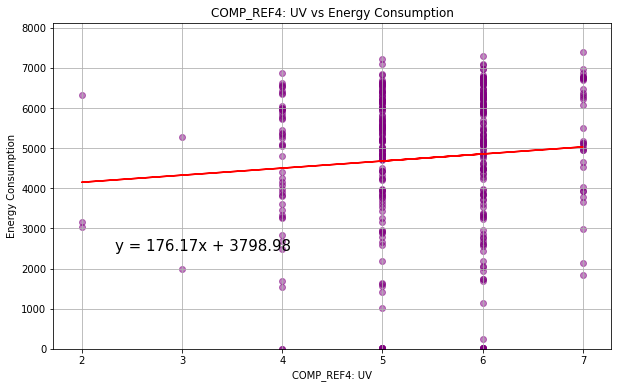

In [908]:
x_values = devices_data6["UV"]
y_values = devices_data6["energy"]
x_label = "COMP_REF4: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Precipitation MM| 
    The correlation is -0.19
    The LinregressResult(slope=-76.76394123998817, intercept=4901.498047149967, rvalue=-0.1878578224957713, pvalue=0.0003016675782588847, stderr=21.03660015204468)
    


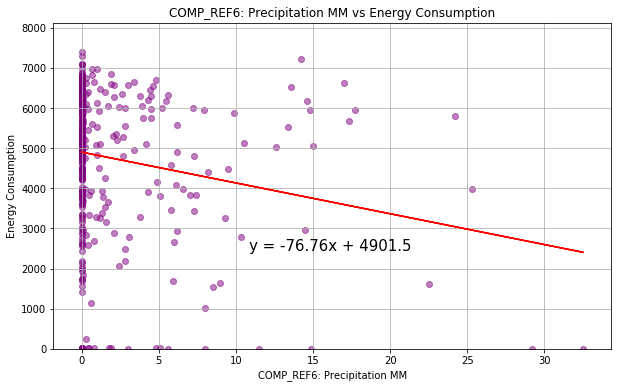

In [909]:
x_values = devices_data6["PrecMM"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Humidity| 
    The correlation is -0.21
    The LinregressResult(slope=-21.34325091097763, intercept=5822.637100730466, rvalue=-0.21001401855770319, pvalue=5.136898876535001e-05, stderr=5.207946165535617)
    


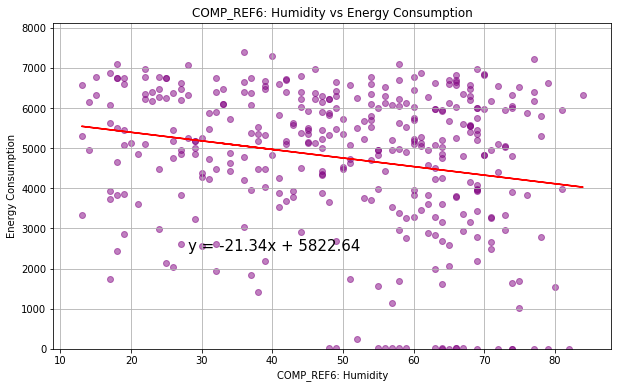

In [910]:
x_values = devices_data6["Hum"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Heat| 
    The correlation is 0.04
    The LinregressResult(slope=24.77091529257871, intercept=4243.004729719857, rvalue=0.03871281265762771, pvalue=0.46029382042696587, stderr=33.51281875253406)
    


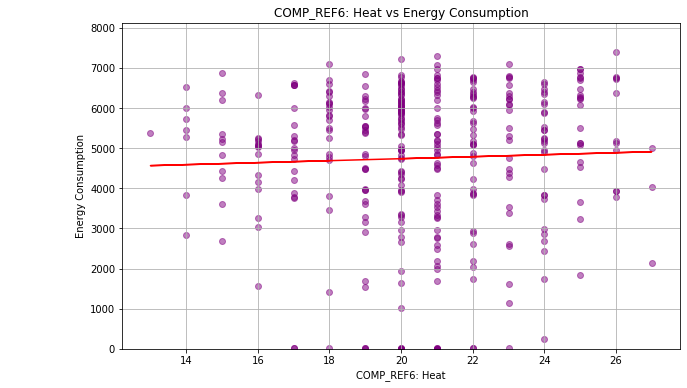

In [911]:
x_values = devices_data6["Heat"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Dew Point| 
    The correlation is -0.2
    The LinregressResult(slope=-63.00401269810031, intercept=5215.390632637136, rvalue=-0.20467109094621927, pvalue=8.012547954853052e-05, stderr=15.79314572530391)
    


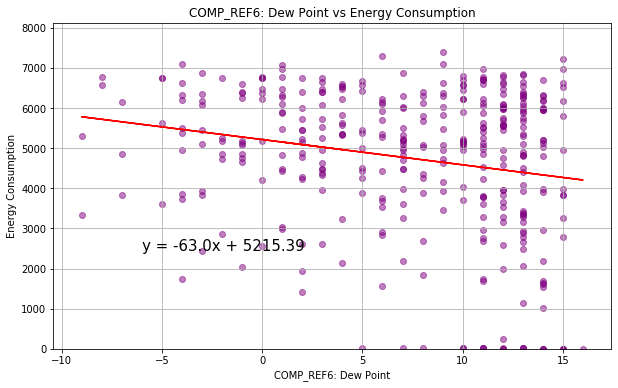

In [912]:
x_values = devices_data6["DP"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Wind Chill| 
    The correlation is 0.06
    The LinregressResult(slope=37.82887249667536, intercept=3985.690645757283, rvalue=0.06191296047936224, pvalue=0.23738556939356129, stderr=31.963708610182966)
    


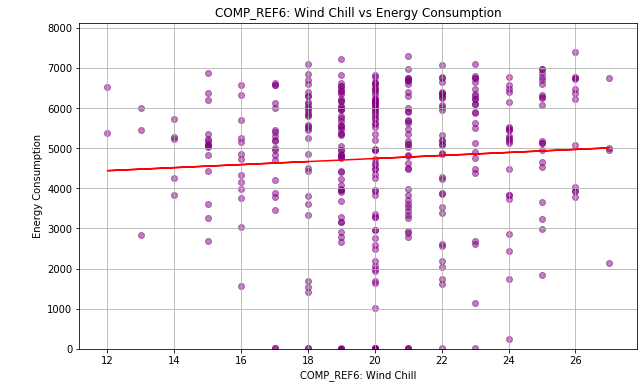

In [913]:
x_values = devices_data6["WChill"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF6: Feel Like| 
    The correlation is 0.05
    The LinregressResult(slope=31.8736196202828, intercept=4105.796945627814, rvalue=0.05230320886276579, pvalue=0.3183377151787274, stderr=31.897563590392448)
    


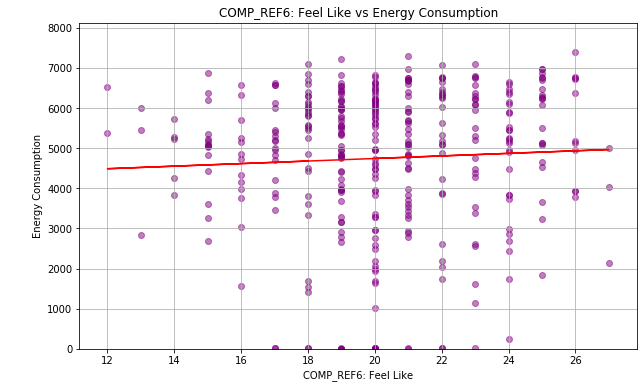

In [914]:
x_values = devices_data6["FLike"]
y_values = devices_data6["energy"]
x_label = "COMP_REF6: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0D4046D8>,
      dtype=object)

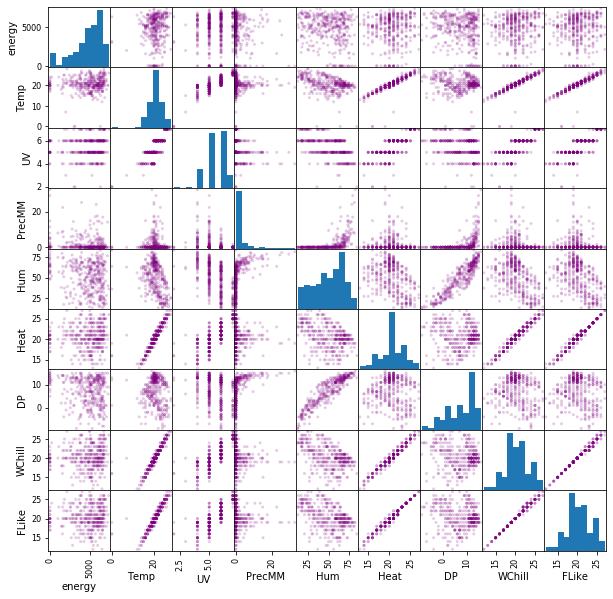

In [915]:
pd.plotting.scatter_matrix(devices_data6.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "purple")

In [916]:
comp7 =  daily_data.loc[ daily_data["device"] == "COMP_REF7", :]
comp7_efficiency = comp7.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp7_efficiency["Total Consumption"] = comp7_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp7_efficiency["Efficiency"] = (comp7_efficiency["Product_A"]+comp7_efficiency["Product_B"])/comp7_efficiency["Total Consumption"]
devices_data7 = comp7_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data7

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                           
2019-03-01 COMP_REF7  5756.86  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF7  5789.40  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF7  5359.15  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF7  5730.81  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF7  5891.55  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                       ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF7  3819.60  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF7  3630.04  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF7  3345.10  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF7  3222.96  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF7  3428.10  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF7   20.0   357800.0  340036.200            5756.86   
2019-03-02 COMP_REF7   20.0   323960.0  314865.300            5789.40   
2019-03-03 COMP_REF7   23.0    78460.0   20084.850            5359.15   
2019-03-04 COMP_REF7   22.0   200500.0  394474.275            5730.81   
2019-03-05 COMP_REF7   21.0   303460.0  425879.850            5891.55   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF7   20.0   468050.0  455990.900            3819.60   
2020-02-26 COMP_REF7   17.0   417640.0  431775.900            3630.04   
2020-02-27 COMP_REF7   13.0   377125.0  410920.426            3345.10   
2020-02-28 COMP_REF7   19.0   396095.0  397005.600            3222.96   
2020-02-29 COMP_REF7   18.0   415180.0  290293.200            3428.10   

                      Efficiency  
Date       device                 
2019-03-01 COMP_REF7  121.218199  
2019-03-02 COMP_REF7  110.343956  
2019-03-03 COMP_REF7   18.388149  
2019-03-04 COMP_REF7  103.820276  
2019-03-05 COMP_REF7  123.794222  
...                          ...  
2020-02-25 COMP_REF7  241.920856  
2020-02-26 COMP_REF7  233.996292  
2020-02-27 COMP_REF7  235.582023  
2020-02-28 COMP_REF7  246.078326  
2020-02-29 COMP_REF7  205.791313  

[366 rows x 13 columns]

In [917]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="orange", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF7: Temperature| 
    The correlation is 0.19
    The LinregressResult(slope=58.31389934117094, intercept=2492.0553518077636, rvalue=0.18816634006524252, pvalue=0.0002947088940039645, stderr=15.95333932689715)
    


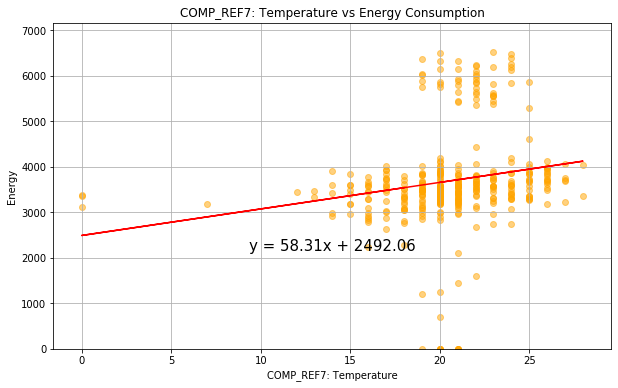

In [918]:
x_values = devices_data7["Temp"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF7: UV| 
    The correlation is 0.23
    The LinregressResult(slope=276.7505730848386, intercept=2194.0200803796024, rvalue=0.226058768964449, pvalue=1.2618417889806367e-05, stderr=62.50663428998039)
    


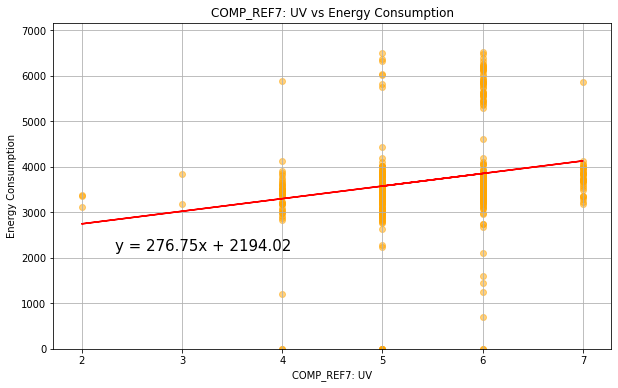

In [919]:
x_values = devices_data7["UV"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Precipitation MM| 
    The correlation is -0.31
    The LinregressResult(slope=-76.15618099909395, intercept=3839.769359786219, rvalue=-0.3067294232116946, pvalue=2.059069975348524e-09, stderr=12.386347127560663)
    


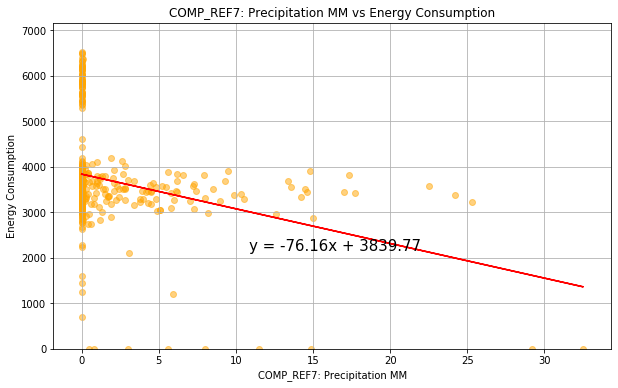

In [920]:
x_values = devices_data7["PrecMM"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Humidity| 
    The correlation is -0.47
    The LinregressResult(slope=-28.870781311660892, intercept=5139.5135042357615, rvalue=-0.46754618008274684, pvalue=2.8192978203099574e-21, stderr=2.8610153892180175)
    


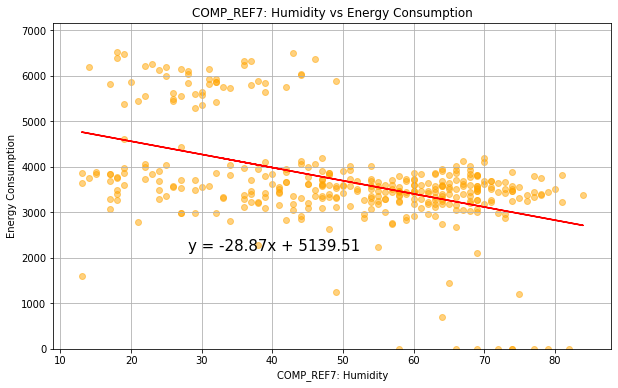

In [921]:
x_values = devices_data7["Hum"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Heat| 
    The correlation is 0.2
    The LinregressResult(slope=78.03540597574212, intercept=2086.8953511328227, rvalue=0.20071629264649601, pvalue=0.00011053983238238099, stderr=19.963149430587528)
    


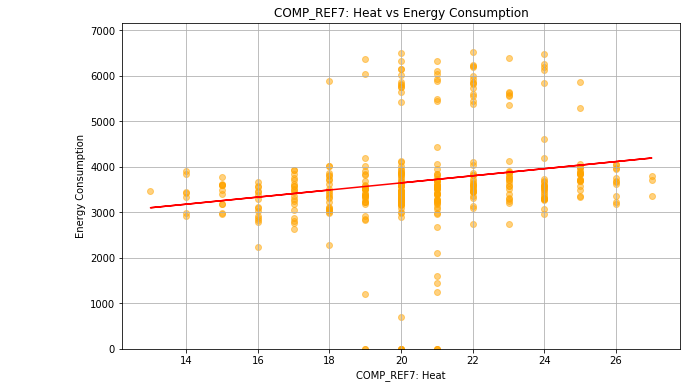

In [922]:
x_values = devices_data7["Heat"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Dew Point| 
    The correlation is -0.44
    The LinregressResult(slope=-81.80450918790955, intercept=4292.968742913356, rvalue=-0.43736477086770564, pvalue=1.5626445676021823e-18, stderr=8.816165052208863)
    


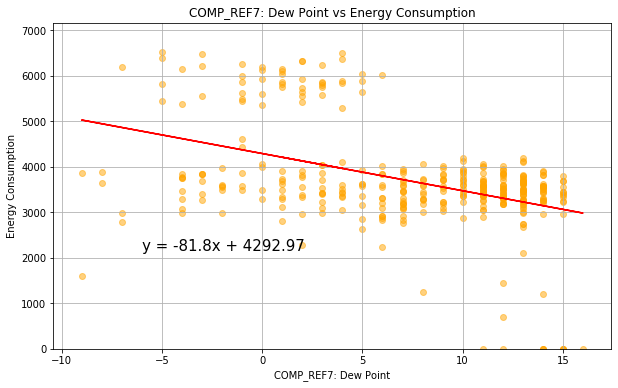

In [923]:
x_values = devices_data7["DP"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Wind Chill| 
    The correlation is 0.24
    The LinregressResult(slope=87.9033621752636, intercept=1910.1070784746428, rvalue=0.23677831263687069, pvalue=4.658081442478438e-06, stderr=18.90532532923994)
    


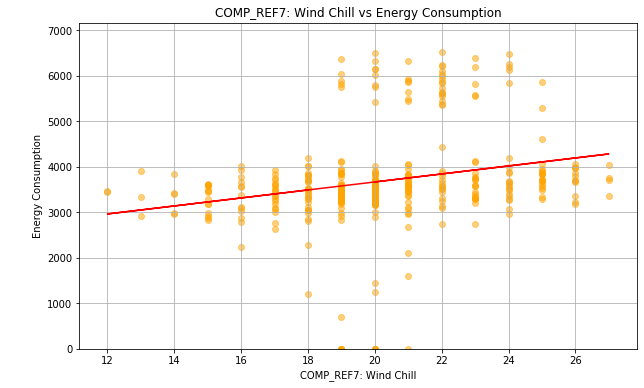

In [924]:
x_values = devices_data7["WChill"]
y_values = devices_data7["energy"]
x_label = "COMP_REF7: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF7: Feel Like| 
    The correlation is 0.05
    The LinregressResult(slope=31.8736196202828, intercept=4105.796945627814, rvalue=0.05230320886276579, pvalue=0.3183377151787274, stderr=31.897563590392448)
    


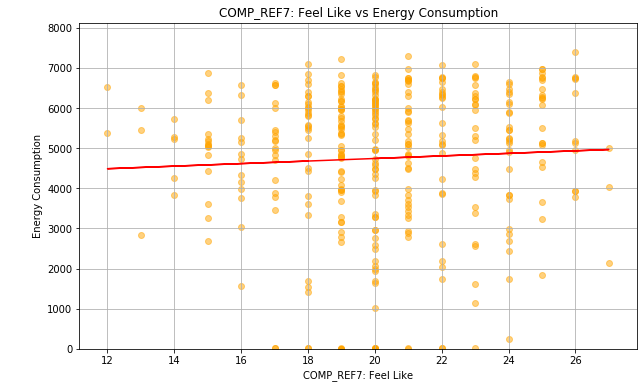

In [925]:
x_values = devices_data6["FLike"]
y_values = devices_data6["energy"]
x_label = "COMP_REF7: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B100477B8>,
      dtype=object)

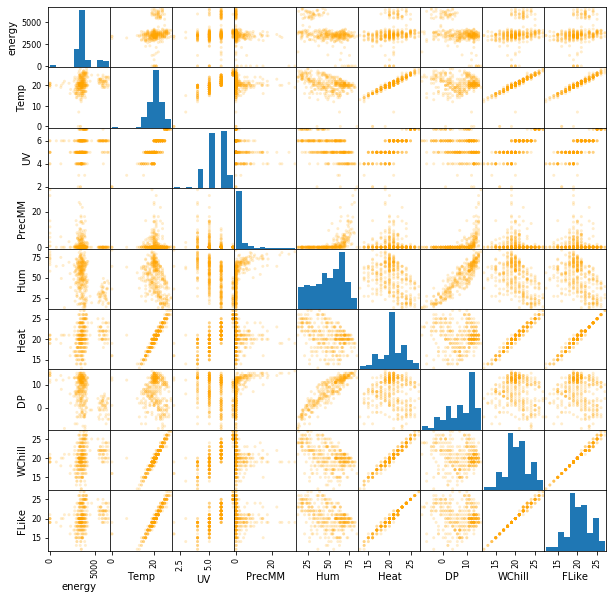

In [926]:
pd.plotting.scatter_matrix(devices_data7.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "orange")

In [927]:
comp8 =  daily_data.loc[ daily_data["device"] == "COMP_REF8", :]
comp8_efficiency = comp8.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp8_efficiency["Total Consumption"] = comp8_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp8_efficiency["Efficiency"] = (comp8_efficiency["Product_A"]+comp8_efficiency["Product_B"])/comp8_efficiency["Total Consumption"]
devices_data8 = comp8_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data8

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                           
2019-03-01 COMP_REF8     0.00  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF8     0.00  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF8     0.00  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF8     0.00  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF8     0.00  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                       ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF8  6959.60  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF8  6927.18  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF8  6806.74  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF8  6908.45  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF8  6788.46  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF8   20.0   357800.0  340036.200               0.00   
2019-03-02 COMP_REF8   20.0   323960.0  314865.300               0.00   
2019-03-03 COMP_REF8   23.0    78460.0   20084.850               0.00   
2019-03-04 COMP_REF8   22.0   200500.0  394474.275               0.00   
2019-03-05 COMP_REF8   21.0   303460.0  425879.850               0.00   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF8   20.0   468050.0  455990.900            6959.60   
2020-02-26 COMP_REF8   17.0   417640.0  431775.900            6927.18   
2020-02-27 COMP_REF8   13.0   377125.0  410920.426            6806.74   
2020-02-28 COMP_REF8   19.0   396095.0  397005.600            6908.45   
2020-02-29 COMP_REF8   18.0   415180.0  290293.200            6788.46   

                      Efficiency  
Date       device                 
2019-03-01 COMP_REF8         inf  
2019-03-02 COMP_REF8         inf  
2019-03-03 COMP_REF8         inf  
2019-03-04 COMP_REF8         inf  
2019-03-05 COMP_REF8         inf  
...                          ...  
2020-02-25 COMP_REF8  132.772128  
2020-02-26 COMP_REF8  122.620735  
2020-02-27 COMP_REF8  115.774280  
2020-02-28 COMP_REF8  114.801526  
2020-02-29 COMP_REF8  103.922421  

[366 rows x 13 columns]

In [928]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="pink", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF8: Temperature| 
    The correlation is -0.22
    The LinregressResult(slope=-128.39525363501932, intercept=6312.466125479044, rvalue=-0.22236644904953057, pvalue=1.759245542396894e-05, stderr=29.506467718823497)
    


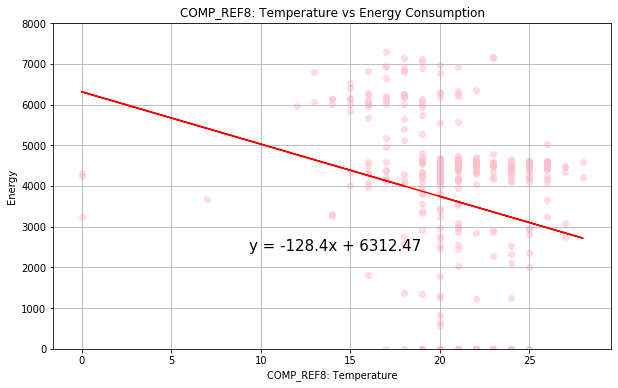

In [929]:
x_values = devices_data8["Temp"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF8: UV| 
    The correlation is -0.2
    The LinregressResult(slope=-448.36935900114287, intercept=6097.370620167388, rvalue=-0.1965708844235309, pvalue=0.0001538640395810585, stderr=117.2219768042616)
    


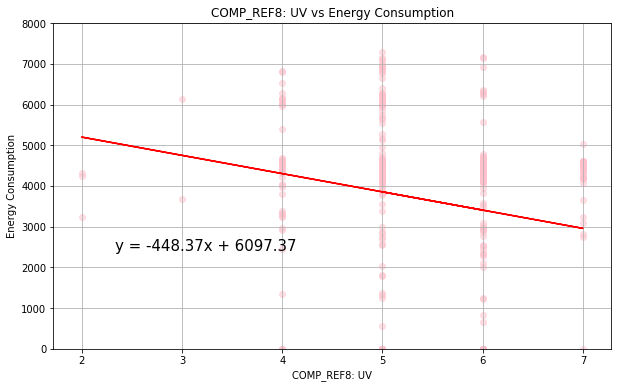

In [930]:
x_values = devices_data8["UV"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Precipitation MM| 
    The correlation is -0.05
    The LinregressResult(slope=-21.230170515648542, intercept=3711.7482511866574, rvalue=-0.045893819094331115, pvalue=0.3813244983068673, stderr=24.220926066069588)
    


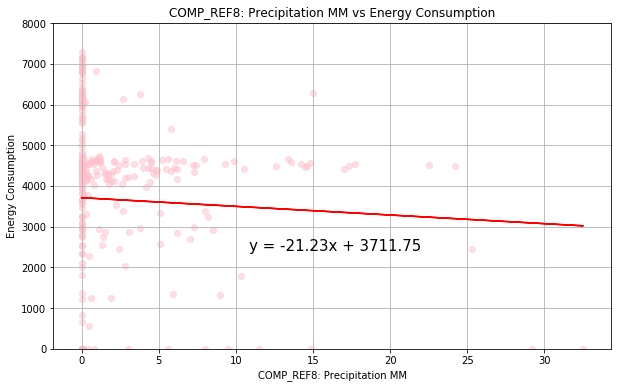

In [931]:
x_values = devices_data8["PrecMM"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Humidity| 
    The correlation is 0.21
    The LinregressResult(slope=23.860938260013405, intercept=2474.169040411185, rvalue=0.20739769698004984, pvalue=6.395266539295032e-05, stderr=5.899099645528033)
    


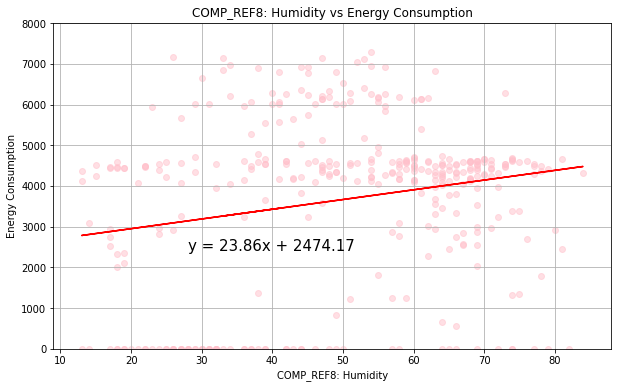

In [932]:
x_values = devices_data8["Hum"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Heat| 
    The correlation is -0.24
    The LinregressResult(slope=-172.82533635536763, intercept=7225.265242850293, rvalue=-0.2385881006479848, pvalue=3.918255019950586e-06, stderr=36.87068622472346)
    


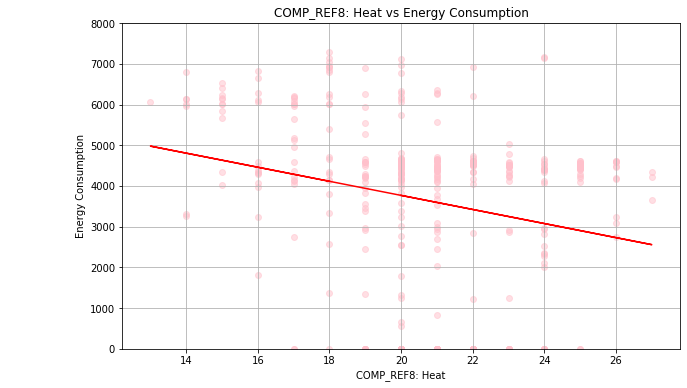

In [933]:
x_values = devices_data8["Heat"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Dew Point| 
    The correlation is 0.19
    The LinregressResult(slope=66.32075212534943, intercept=3183.282634794905, rvalue=0.19031211435206755, pvalue=0.00025029927355021893, stderr=17.931704121950315)
    


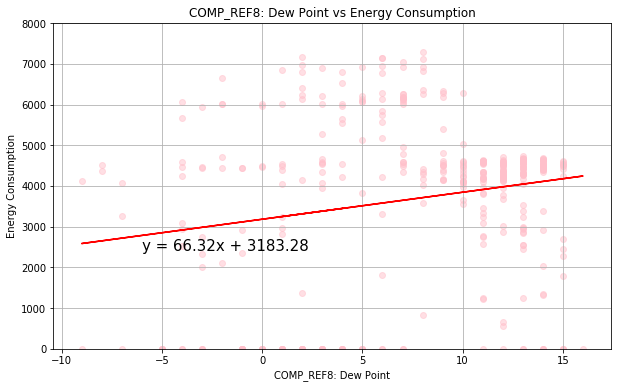

In [934]:
x_values = devices_data8["DP"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Wind Chill| 
    The correlation is -0.27
    The LinregressResult(slope=-186.15963858454685, intercept=7444.088266280745, rvalue=-0.26913637487842423, pvalue=1.7131121915667734e-07, stderr=34.91682582943081)
    


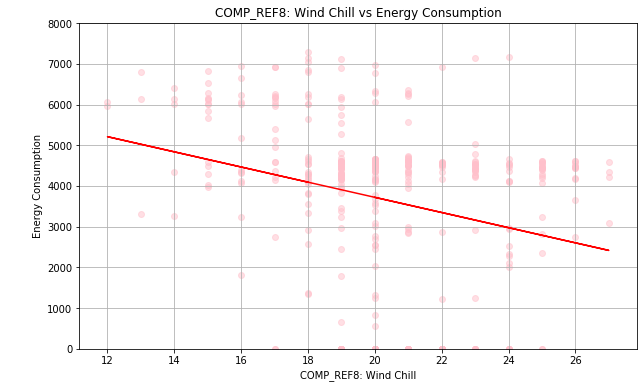

In [935]:
x_values = devices_data8["WChill"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Feel Like| 
    The correlation is -0.26
    The LinregressResult(slope=-182.24568210174874, intercept=7368.236016632749, rvalue=-0.2641696334311595, pvalue=2.9291027624042934e-07, stderr=34.87507838042141)
    


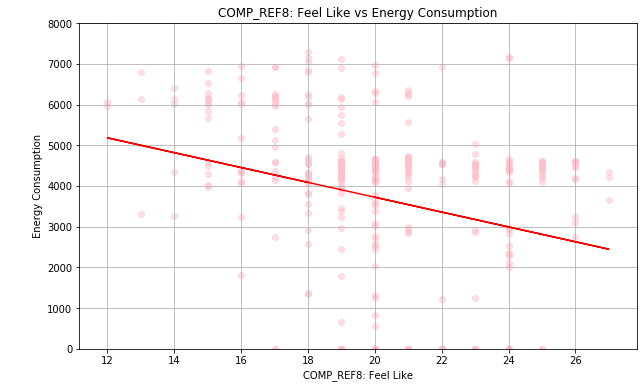

In [936]:
x_values = devices_data8["FLike"]
y_values = devices_data8["energy"]
x_label = "COMP_REF8: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B137A6F60>,
      dtype=object)

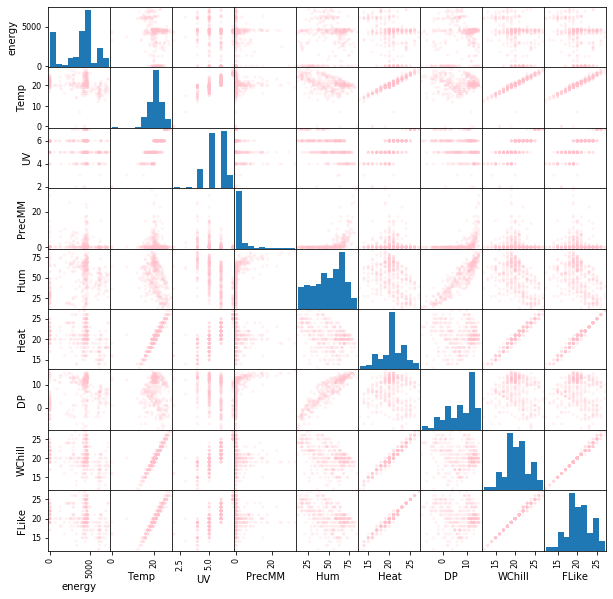

In [937]:
pd.plotting.scatter_matrix(devices_data8.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "pink")

In [938]:
comp9 =  daily_data.loc[ daily_data["device"] == "COMP_REF9", :]
comp9_efficiency = comp9.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp9_efficiency["Total Consumption"] = comp9_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp9_efficiency["Efficiency"] = (comp9_efficiency["Product_A"]+comp9_efficiency["Product_B"])/comp9_efficiency["Total Consumption"]
devices_data9 = comp9_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data9

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                             
2019-03-01 COMP_REF9     0.0000  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF9     0.0000  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF9     0.0000  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF9     0.0000  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF9     0.0000  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                         ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF9  2025.4223  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF9  1571.4806  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF9   760.1057  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF9   458.6478  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF9  1255.4903  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF9   20.0   357800.0  340036.200             0.0000   
2019-03-02 COMP_REF9   20.0   323960.0  314865.300             0.0000   
2019-03-03 COMP_REF9   23.0    78460.0   20084.850             0.0000   
2019-03-04 COMP_REF9   22.0   200500.0  394474.275             0.0000   
2019-03-05 COMP_REF9   21.0   303460.0  425879.850             0.0000   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF9   20.0   468050.0  455990.900          2025.4223   
2020-02-26 COMP_REF9   17.0   417640.0  431775.900          1571.4806   
2020-02-27 COMP_REF9   13.0   377125.0  410920.426           760.1057   
2020-02-28 COMP_REF9   19.0   396095.0  397005.600           458.6478   
2020-02-29 COMP_REF9   18.0   415180.0  290293.200          1255.4903   

                       Efficiency  
Date       device                  
2019-03-01 COMP_REF9          inf  
2019-03-02 COMP_REF9          inf  
2019-03-03 COMP_REF9          inf  
2019-03-04 COMP_REF9          inf  
2019-03-05 COMP_REF9          inf  
...                           ...  
2020-02-25 COMP_REF9   456.221352  
2020-02-26 COMP_REF9   540.519495  
2020-02-27 COMP_REF9  1036.757685  
2020-02-28 COMP_REF9  1729.214879  
2020-02-29 COMP_REF9   561.910514  

[366 rows x 13 columns]

In [939]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="brown", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF9: Temperature| 
    The correlation is 0.05
    The LinregressResult(slope=12.412801393915917, intercept=758.8595803344789, rvalue=0.04731307536285157, pvalue=0.36675854076691483, stderr=13.735715968906453)
    


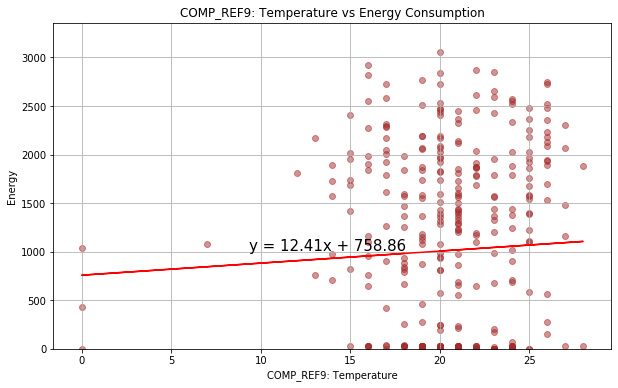

In [940]:
x_values = devices_data9["Temp"]
y_values = devices_data9["energy"]
x_label = "COMP_REF9: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF9: UV| 
    The correlation is 0.1
    The LinregressResult(slope=106.17730825794638, intercept=439.5796886366346, rvalue=0.10244860689768698, pvalue=0.05018208728488954, stderr=54.0360756856148)
    


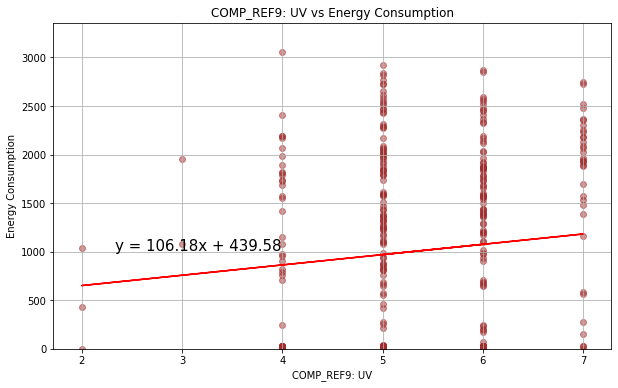

In [941]:
x_values = devices_data9["UV"]
y_values = devices_data9["energy"]
x_label = "COMP_REF9: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF9: Precipitation MM| 
    The correlation is -0.13
    The LinregressResult(slope=-26.694158672901136, intercept=1066.0845465060902, rvalue=-0.12700126151378738, pvalue=0.015048145002542817, stderr=10.927643545819054)
    


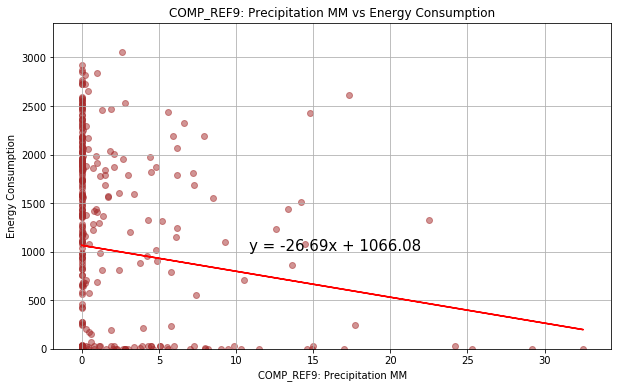

In [942]:
x_values = devices_data9["PrecMM"]
y_values = devices_data9["energy"]
x_label = "COMP_REF9: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF9: Humidity| 
    The correlation is -0.05
    The LinregressResult(slope=-2.6757148713554844, intercept=1148.430211213783, rvalue=-0.05118554420786277, pvalue=0.3288030211931654, stderr=2.736353186134852)
    


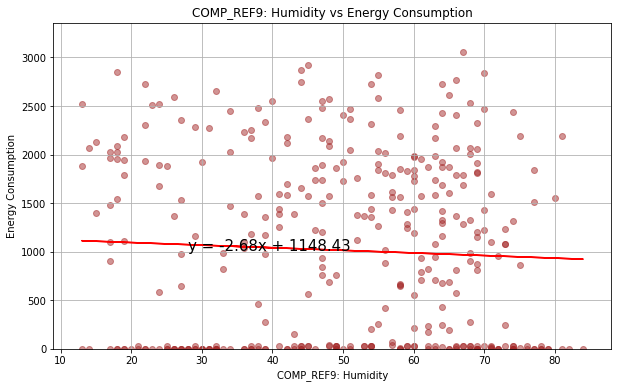

In [943]:
x_values = devices_data9["Hum"]
y_values = devices_data9["energy"]
x_label = "COMP_REF9: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF9: Heat| 
    The correlation is 0.02
    The LinregressResult(slope=8.203782212808667, intercept=845.533719131083, rvalue=0.024925654552629385, pvalue=0.6345742050293519, stderr=17.245742846279896)
    


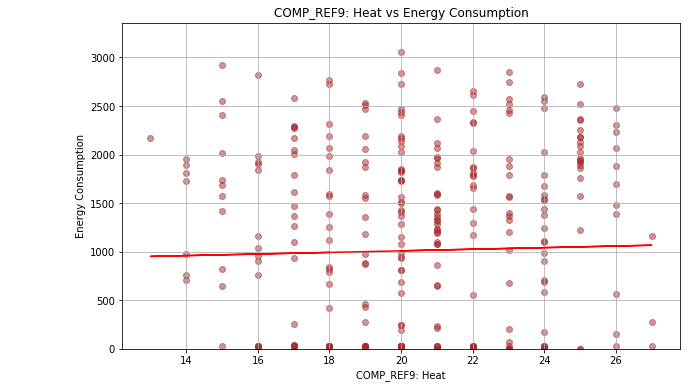

In [944]:
x_values = devices_data9["Heat"]
y_values = devices_data9["energy"]
x_label = "COMP_REF9: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF8: Dew Point| 
    The correlation is -0.01
    The LinregressResult(slope=-2.352109390784188, intercept=1031.5525569721822, rvalue=-0.014854758218983423, pvalue=0.7769991760390336, stderr=8.298379933349112)
    


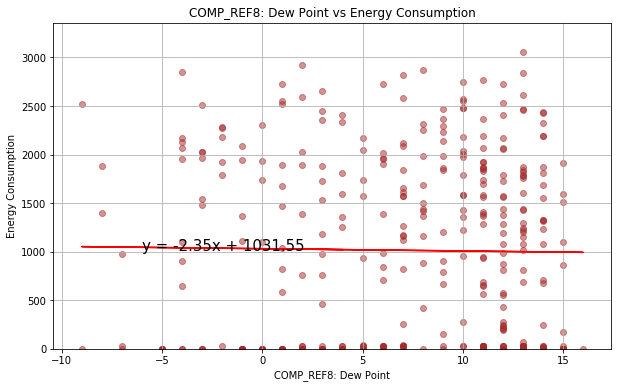

In [945]:
x_values = devices_data9["DP"]
y_values = devices_data9["energy"]
x_label = "COMP_REF8: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF9: Wind Chill| 
    The correlation is 0.02
    The LinregressResult(slope=6.7394611419112085, intercept=877.6594302955212, rvalue=0.021443867992088254, pvalue=0.6826210816055235, stderr=16.469161217518693)
    


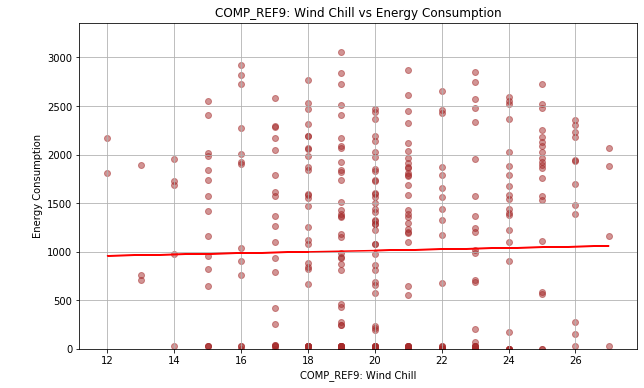

In [946]:
x_values = devices_data9["WChill"]
y_values = devices_data9["energy"]
x_label = "COMP_REF9: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF9: Feel Like| 
    The correlation is 0.02
    The LinregressResult(slope=5.038169264998732, intercept=912.0490949128947, rvalue=0.01607272375332974, pvalue=0.7592564971639522, stderr=16.427689230253186)
    


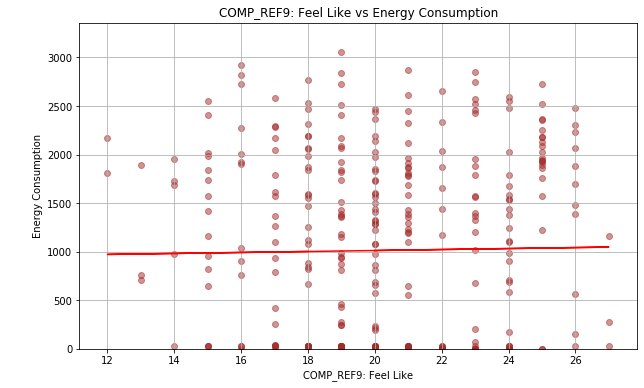

In [947]:
x_values = devices_data9["FLike"]
y_values = devices_data9["energy"]
x_label = "COMP_REF9: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B16836550>,
      dtype=object)

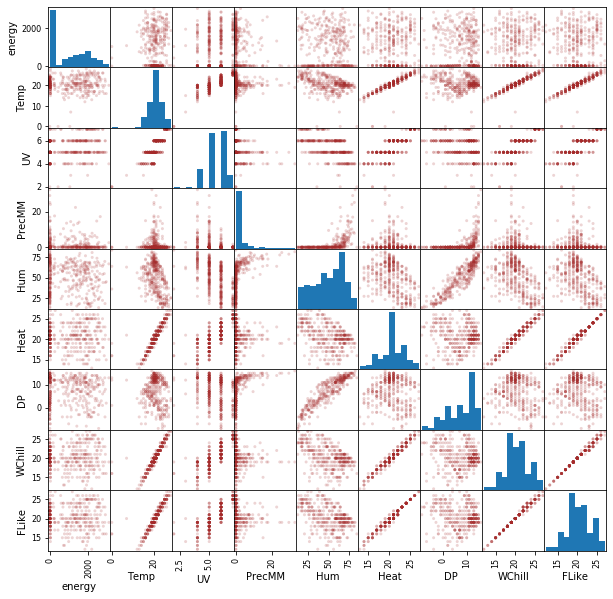

In [948]:
pd.plotting.scatter_matrix(devices_data9.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "brown")

In [949]:
comp13 =  daily_data.loc[ daily_data["device"] == "COMP_REF13", :]
comp13_efficiency = comp13.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp13_efficiency["Total Consumption"] = comp13_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp13_efficiency["Efficiency"] = (comp13_efficiency["Product_A"]+comp13_efficiency["Product_B"])/comp13_efficiency["Total Consumption"]
devices_data13 = comp6_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data13

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                             
2019-03-01 COMP_REF2  6476.8864  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF2  6084.0749  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF2  2564.2945  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF2  4888.2142  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF2  5340.9948  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                         ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF2  5730.2421  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF2  5452.7704  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF2  5992.0897  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF2  5526.3986  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF2  5831.8796  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                      FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                       
2019-03-01 COMP_REF2   20.0   357800.0  340036.200          6476.8864   
2019-03-02 COMP_REF2   20.0   323960.0  314865.300          6084.0749   
2019-03-03 COMP_REF2   23.0    78460.0   20084.850          2564.2945   
2019-03-04 COMP_REF2   22.0   200500.0  394474.275          4888.2142   
2019-03-05 COMP_REF2   21.0   303460.0  425879.850          5340.9948   
...                     ...        ...         ...                ...   
2020-02-25 COMP_REF2   20.0   468050.0  455990.900          5730.2421   
2020-02-26 COMP_REF2   17.0   417640.0  431775.900          5452.7704   
2020-02-27 COMP_REF2   13.0   377125.0  410920.426          5992.0897   
2020-02-28 COMP_REF2   19.0   396095.0  397005.600          5526.3986   
2020-02-29 COMP_REF2   18.0   415180.0  290293.200          5831.8796   

                      Efficiency  
Date       device                 
2019-03-01 COMP_REF2  107.742541  
2019-03-02 COMP_REF2  104.999578  
2019-03-03 COMP_REF2   38.429615  
2019-03-04 COMP_REF2  121.716081  
2019-03-05 COMP_REF2  136.555057  
...                          ...  
2020-02-25 COMP_REF2  161.256869  
2020-02-26 COMP_REF2  155.776942  
2020-02-27 COMP_REF2  131.514291  
2020-02-28 COMP_REF2  143.511291  
2020-02-29 COMP_REF2  120.968410  

[366 rows x 13 columns]

In [950]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="grey", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF13: Temperature| 
    The correlation is 0.07
    The LinregressResult(slope=36.91466303306399, intercept=3992.9258308688395, rvalue=0.07237532091531501, pvalue=0.16706455492309422, stderr=26.663506754098236)
    


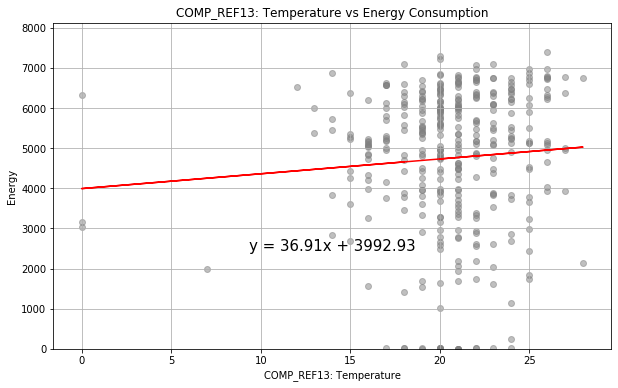

In [951]:
x_values = devices_data13["Temp"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF13: UV| 
    The correlation is 0.09
    The LinregressResult(slope=176.16736623645068, intercept=3798.982592583583, rvalue=0.08743393612855554, pvalue=0.09488221676818223, stderr=105.20305170929495)
    


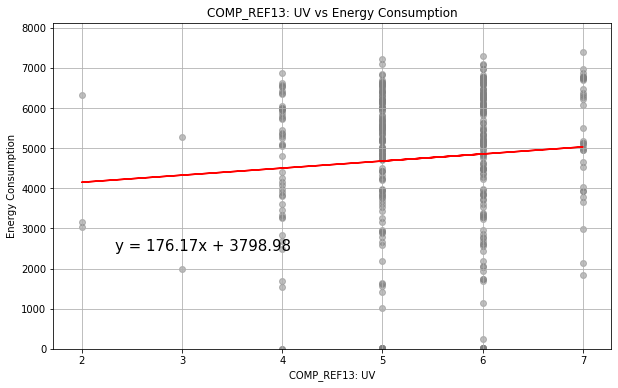

In [952]:
x_values = devices_data13["UV"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF13: Precipitation MM| 
    The correlation is -0.19
    The LinregressResult(slope=-76.76394123998817, intercept=4901.498047149967, rvalue=-0.1878578224957713, pvalue=0.0003016675782588847, stderr=21.03660015204468)
    


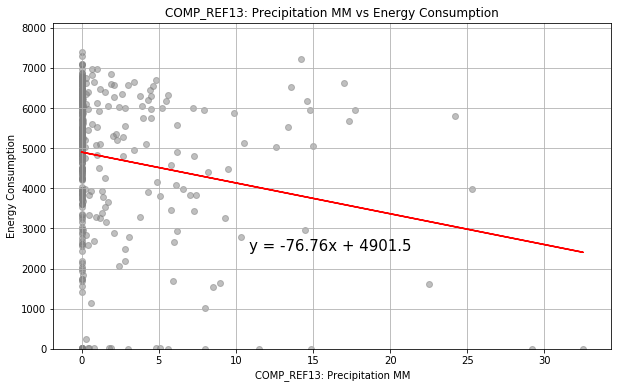

In [953]:
x_values = devices_data13["PrecMM"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF13: Humidity| 
    The correlation is -0.21
    The LinregressResult(slope=-21.34325091097763, intercept=5822.637100730466, rvalue=-0.21001401855770319, pvalue=5.136898876535001e-05, stderr=5.207946165535617)
    


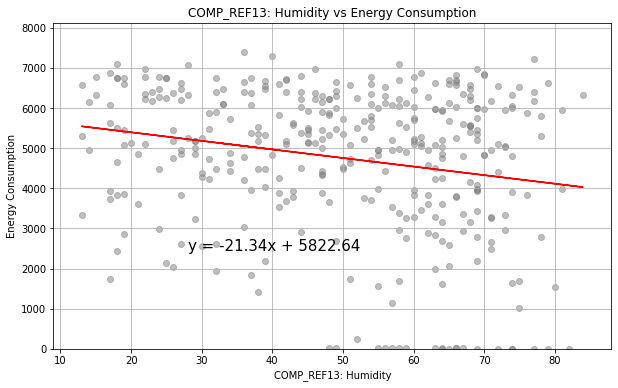

In [954]:
x_values = devices_data13["Hum"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF13: Heat| 
    The correlation is 0.04
    The LinregressResult(slope=24.77091529257871, intercept=4243.004729719857, rvalue=0.03871281265762771, pvalue=0.46029382042696587, stderr=33.51281875253406)
    


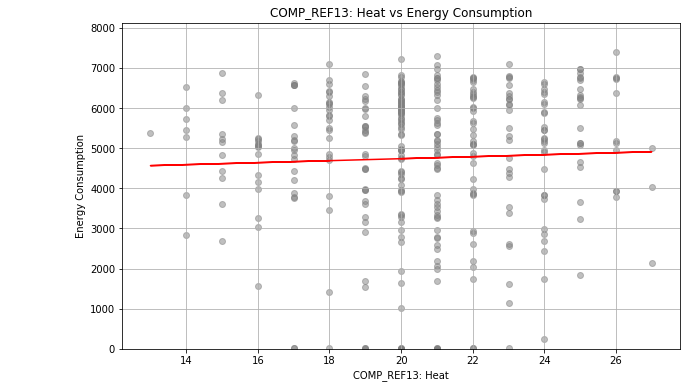

In [955]:
x_values = devices_data13["Heat"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF13: Dew Point| 
    The correlation is -0.2
    The LinregressResult(slope=-63.00401269810031, intercept=5215.390632637136, rvalue=-0.20467109094621927, pvalue=8.012547954853052e-05, stderr=15.79314572530391)
    


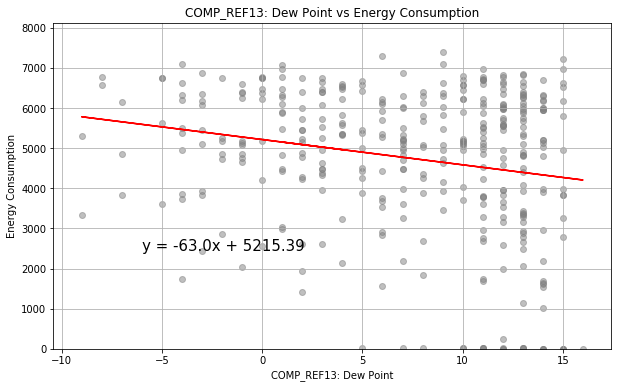

In [956]:
x_values = devices_data13["DP"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF13: Wind Chill| 
    The correlation is 0.06
    The LinregressResult(slope=37.82887249667536, intercept=3985.690645757283, rvalue=0.06191296047936224, pvalue=0.23738556939356129, stderr=31.963708610182966)
    


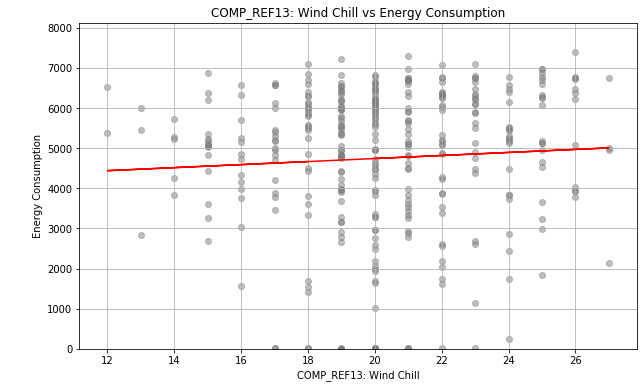

In [957]:
x_values = devices_data13["WChill"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF13: Feel Like| 
    The correlation is 0.05
    The LinregressResult(slope=31.8736196202828, intercept=4105.796945627814, rvalue=0.05230320886276579, pvalue=0.3183377151787274, stderr=31.897563590392448)
    


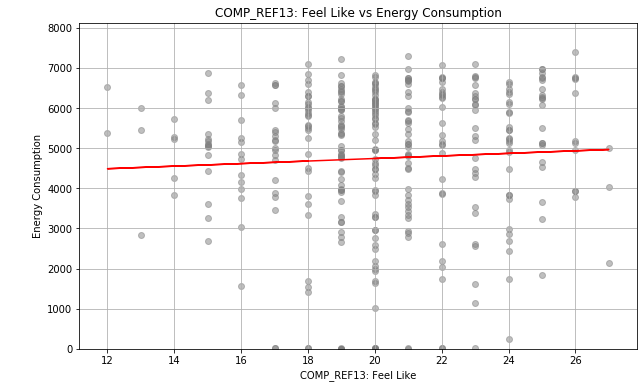

In [958]:
x_values = devices_data13["FLike"]
y_values = devices_data13["energy"]
x_label = "COMP_REF13: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B00156F98>,
      dtype=object)

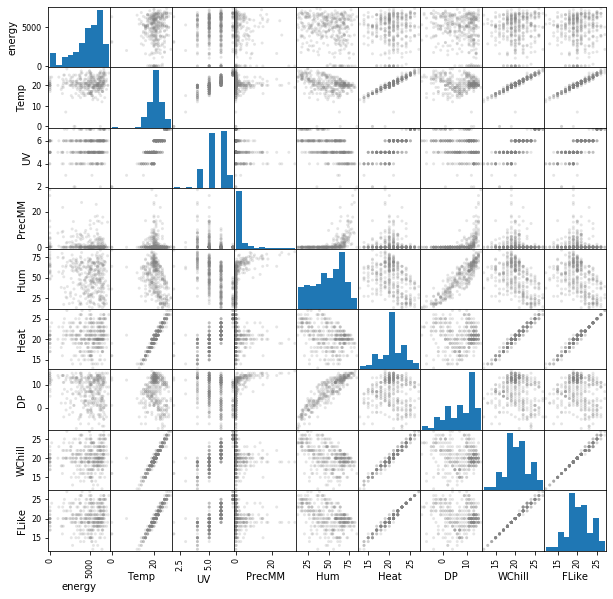

In [959]:
pd.plotting.scatter_matrix(devices_data13.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "grey")

In [960]:
comp14 =  daily_data.loc[ daily_data["device"] == "COMP_REF14", :]
comp14_efficiency = comp14.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
comp14_efficiency["Total Consumption"] = comp14_efficiency.groupby(["Date","device"])[["energy",]].sum()
comp14_efficiency["Efficiency"] = (comp14_efficiency["Product_A"]+comp14_efficiency["Product_B"])/comp14_efficiency["Total Consumption"]
devices_data14 = comp14_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Product_A","Product_B","Total Consumption","Efficiency"]].mean()
devices_data14

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                              
2019-03-01 COMP_REF14  1746.1431  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 COMP_REF14  1365.2370  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 COMP_REF14     4.2068  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 COMP_REF14     9.2913  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 COMP_REF14  1421.4789  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                          ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 COMP_REF14  4612.5339  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 COMP_REF14  5093.0279  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 COMP_REF14  4296.6382  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 COMP_REF14  5095.2384  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 COMP_REF14  4548.6573  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                       FLike  Product_A   Product_B  Total Consumption  \
Date       device                                                        
2019-03-01 COMP_REF14   20.0   357800.0  340036.200          1746.1431   
2019-03-02 COMP_REF14   20.0   323960.0  314865.300          1365.2370   
2019-03-03 COMP_REF14   23.0    78460.0   20084.850             4.2068   
2019-03-04 COMP_REF14   22.0   200500.0  394474.275             9.2913   
2019-03-05 COMP_REF14   21.0   303460.0  425879.850          1421.4789   
...                      ...        ...         ...                ...   
2020-02-25 COMP_REF14   20.0   468050.0  455990.900          4612.5339   
2020-02-26 COMP_REF14   17.0   417640.0  431775.900          5093.0279   
2020-02-27 COMP_REF14   13.0   377125.0  410920.426          4296.6382   
2020-02-28 COMP_REF14   19.0   396095.0  397005.600          5095.2384   
2020-02-29 COMP_REF14   18.0   415180.0  290293.200          4548.6573   

                         Efficiency  
Date       device                    
2019-03-01 COMP_REF14    399.644336  
2019-03-02 COMP_REF14    467.922639  
2019-03-03 COMP_REF14  23425.133118  
2019-03-04 COMP_REF14  64035.632796  
2019-03-05 COMP_REF14    513.085245  
...                             ...  
2020-02-25 COMP_REF14    200.332598  
2020-02-26 COMP_REF14    166.780139  
2020-02-27 COMP_REF14    183.409770  
2020-02-28 COMP_REF14    155.655249  
2020-02-29 COMP_REF14    155.094823  

[366 rows x 13 columns]

In [961]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="yellow", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs COMP_REF14: Temperature| 
    The correlation is 0.08
    The LinregressResult(slope=36.26270696190108, intercept=1723.5561441801176, rvalue=0.08066459066931995, pvalue=0.12345390676892533, stderr=23.48599959034302)
    


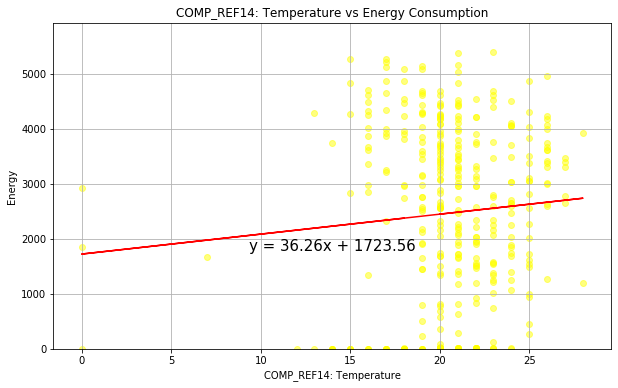

In [962]:
x_values = devices_data14["Temp"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs COMP_REF14: UV| 
    The correlation is 0.07
    The LinregressResult(slope=119.93287733363802, intercept=1820.570942355364, rvalue=0.06753422826663719, pvalue=0.19737777516199767, stderr=92.86904372929692)
    


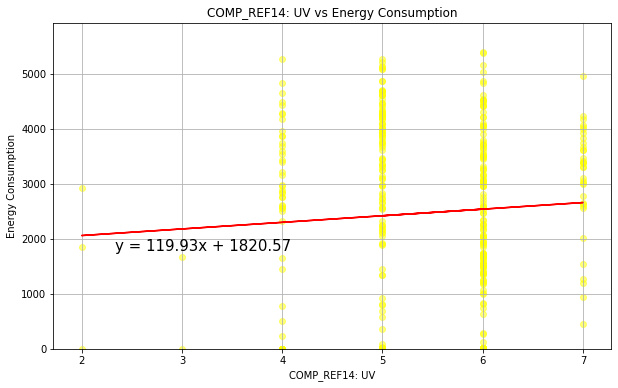

In [963]:
x_values = devices_data14["UV"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF14: Precipitation MM| 
    The correlation is -0.07
    The LinregressResult(slope=-25.951957494682848, intercept=2520.0881571153627, rvalue=-0.07205651617117018, pvalue=0.16894689093546808, stderr=18.82850214983536)
    


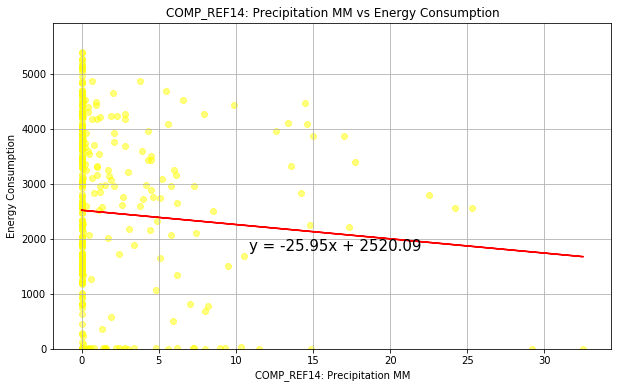

In [964]:
x_values = devices_data14["PrecMM"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF14: Humidity| 
    The correlation is 0.0
    The LinregressResult(slope=0.3286901868520459, intercept=2453.235522625897, rvalue=0.0036694888574419866, pvalue=0.944224259951064, stderr=4.6949130035862465)
    


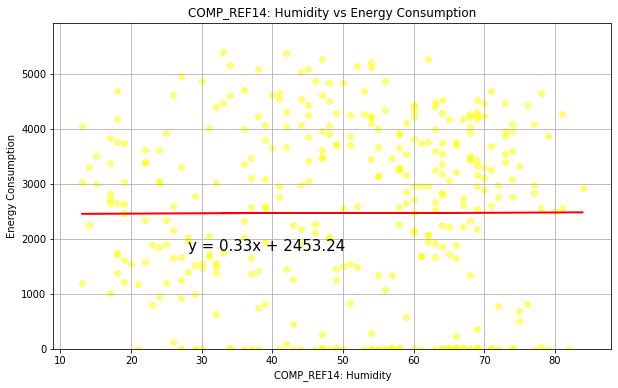

In [965]:
x_values = devices_data14["Hum"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF14: Heat| 
    The correlation is 0.09
    The LinregressResult(slope=48.58304976605511, intercept=1470.4447985276975, rvalue=0.08614470049725942, pvalue=0.09987338298801, stderr=29.450188420620584)
    


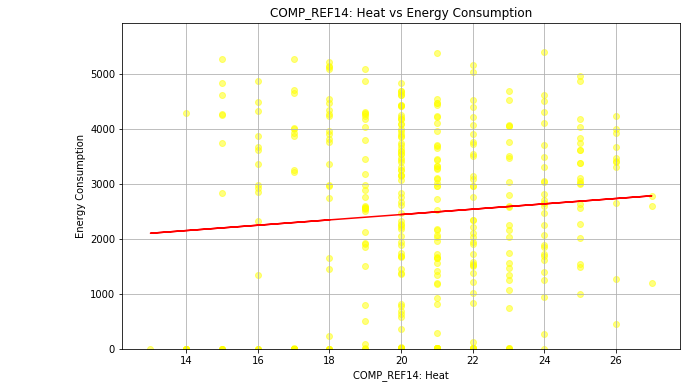

In [966]:
x_values = devices_data14["Heat"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF14: Dew Point| 
    The correlation is 0.05
    The LinregressResult(slope=12.462636623768054, intercept=2378.152909887125, rvalue=0.04593347965894894, pvalue=0.38091271636506807, stderr=14.205981821205848)
    


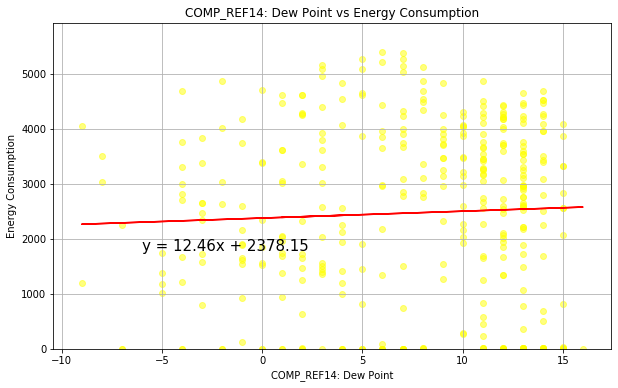

In [967]:
x_values = devices_data14["DP"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF14: Wind Chill| 
    The correlation is 0.07
    The LinregressResult(slope=39.06686794361606, intercept=1677.8112066292692, rvalue=0.07254339696282101, pvalue=0.16607851459255843, stderr=28.152323861438045)
    


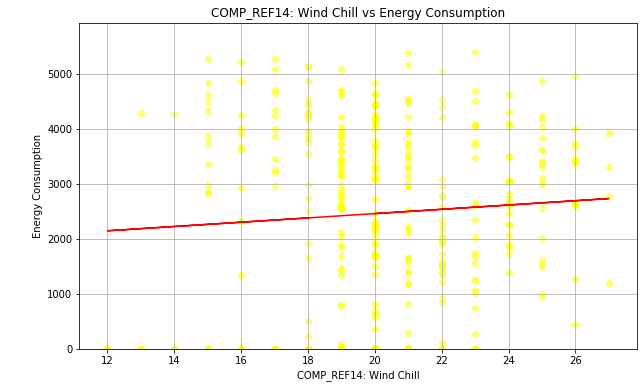

In [968]:
x_values = devices_data14["WChill"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

|Energy Consumption Vs COMP_REF14: Feel Like| 
    The correlation is 0.07
    The LinregressResult(slope=36.20655039678687, intercept=1735.098775009456, rvalue=0.06740858606484737, pvalue=0.19821464883697357, stderr=28.08874218555001)
    


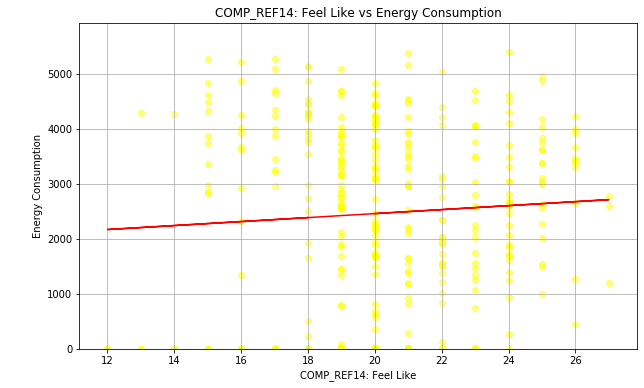

In [969]:
x_values = devices_data14["FLike"]
y_values = devices_data14["energy"]
x_label = "COMP_REF14: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy Consumption")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014ABF413EF0>,
      dtype=object)

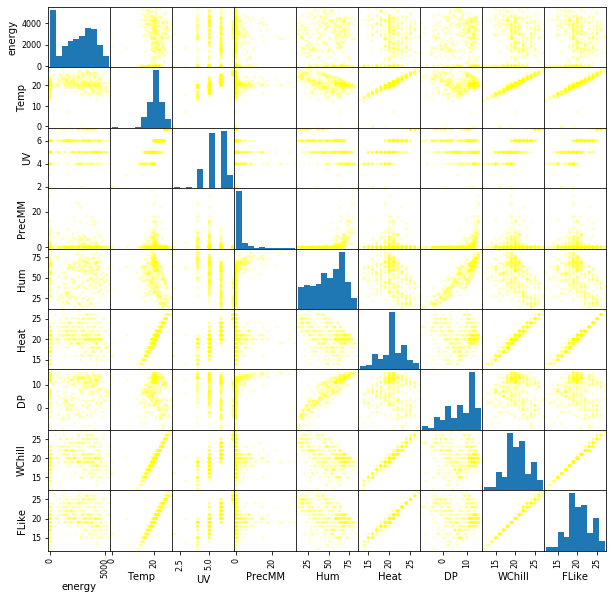

In [970]:
pd.plotting.scatter_matrix(devices_data14.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "yellow")

In [971]:
tun1 =  daily_data.loc[ daily_data["device"] == "TUNEL1", :]
tun1_efficiency = tun1.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
tun1_efficiency["Total Consumption"] = tun1_efficiency.groupby(["Date","device"])[["energy",]].sum()
tun1_efficiency["Efficiency"] = (tun1_efficiency["Product_A"]+tun1_efficiency["Product_B"])/tun1_efficiency["Total Consumption"]
tun_data1 = tun1_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Total Consumption","Efficiency"]].mean()
tun_data1

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                          
2019-03-01 TUNEL1     0.0000  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 TUNEL1     0.0000  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 TUNEL1     0.0000  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 TUNEL1     0.0000  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 TUNEL1     0.0000  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                      ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 TUNEL1  1713.5556  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 TUNEL1  1170.9057  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 TUNEL1   625.5945  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 TUNEL1   474.9053  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 TUNEL1  1132.2187  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                   FLike  Total Consumption   Efficiency  
Date       device                                         
2019-03-01 TUNEL1   20.0             0.0000          inf  
2019-03-02 TUNEL1   20.0             0.0000          inf  
2019-03-03 TUNEL1   23.0             0.0000          inf  
2019-03-04 TUNEL1   22.0             0.0000          inf  
2019-03-05 TUNEL1   21.0             0.0000          inf  
...                  ...                ...          ...  
2020-02-25 TUNEL1   20.0          1713.5556   539.253526  
2020-02-26 TUNEL1   17.0          1170.9057   725.434935  
2020-02-27 TUNEL1   13.0           625.5945  1259.674479  
2020-02-28 TUNEL1   19.0           474.9053  1670.018423  
2020-02-29 TUNEL1   18.0          1132.2187   623.089161  

[366 rows x 11 columns]

In [972]:
tun2 =  daily_data.loc[ daily_data["device"] == "TUNEL2", :]
tun2_efficiency = tun2.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
tun2_efficiency["Total Consumption"] = tun2_efficiency.groupby(["Date","device"])[["energy",]].sum()
tun2_efficiency["Efficiency"] = (tun2_efficiency["Product_A"]+tun2_efficiency["Product_B"])/tun2_efficiency["Total Consumption"]
tun_data2 = tun2_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Total Consumption","Efficiency"]].mean()
tun_data2

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                          
2019-03-01 TUNEL2     0.0000  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 TUNEL2     0.0000  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 TUNEL2     0.0000  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 TUNEL2     0.0000  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 TUNEL2     0.0000  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                      ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 TUNEL2  3298.6039  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 TUNEL2  3637.8900  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 TUNEL2  3059.7237  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 TUNEL2  3658.6748  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 TUNEL2  3220.6501  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                   FLike  Total Consumption  Efficiency  
Date       device                                        
2019-03-01 TUNEL2   20.0             0.0000         inf  
2019-03-02 TUNEL2   20.0             0.0000         inf  
2019-03-03 TUNEL2   23.0             0.0000         inf  
2019-03-04 TUNEL2   22.0             0.0000         inf  
2019-03-05 TUNEL2   21.0             0.0000         inf  
...                  ...                ...         ...  
2020-02-25 TUNEL2   20.0          3298.6039  280.130906  
2020-02-26 TUNEL2   17.0          3637.8900  233.491364  
2020-02-27 TUNEL2   13.0          3059.7237  257.554441  
2020-02-28 TUNEL2   19.0          3658.6748  216.772641  
2020-02-29 TUNEL2   18.0          3220.6501  219.046832  

[366 rows x 11 columns]

In [973]:
tun3 =  daily_data.loc[ daily_data["device"] == "TUNEL3", :]
tun3_efficiency = tun3.groupby(["Date","device"])[["Product_A","Product_B","energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
tun3_efficiency["Total Consumption"] = tun3_efficiency.groupby(["Date","device"])[["energy",]].sum()
tun3_efficiency["Efficiency"] = (tun3_efficiency["Product_A"]+tun3_efficiency["Product_B"])/tun3_efficiency["Total Consumption"]
tun_data3 = tun3_efficiency.groupby(["Date","device"])[["energy","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike',"Total Consumption","Efficiency"]].mean()
tun_data3

energy  Temp   UV  PrecMM   Hum  Heat   DP  WChill  \
Date       device                                                          
2019-03-01 TUNEL3  5078.9900  20.0  6.0     0.0  33.0  20.0  1.0    20.0   
2019-03-02 TUNEL3  4379.0500  21.0  6.0     0.0  37.0  20.0  3.0    20.0   
2019-03-03 TUNEL3  1923.8800  22.0  6.0     0.0  30.0  23.0  0.0    22.0   
2019-03-04 TUNEL3  3609.4700  22.0  6.0     0.0  34.0  22.0  2.0    22.0   
2019-03-05 TUNEL3  4075.7000  21.0  6.0     0.0  38.0  21.0  4.0    21.0   
...                      ...   ...  ...     ...   ...   ...  ...     ...   
2020-02-25 TUNEL3  4304.7500  20.0  5.0     0.0  34.0  20.0  2.0    20.0   
2020-02-26 TUNEL3  3895.7588  18.0  5.0     0.0  45.0  18.0  5.0    17.0   
2020-02-27 TUNEL3  4400.8530  13.0  4.0     0.0  49.0  14.0  2.0    13.0   
2020-02-28 TUNEL3  3931.2602  19.0  5.0     0.0  38.0  19.0  3.0    19.0   
2020-02-29 TUNEL3  4331.1538  18.0  5.0     0.0  41.0  18.0  4.0    18.0   

                   FLike  Total Consumption  Efficiency  
Date       device                                        
2019-03-01 TUNEL3   20.0          5078.9900  137.396648  
2019-03-02 TUNEL3   20.0          4379.0500  145.882166  
2019-03-03 TUNEL3   23.0          1923.8800   51.221932  
2019-03-04 TUNEL3   22.0          3609.4700  164.837019  
2019-03-05 TUNEL3   21.0          4075.7000  178.948365  
...                  ...                ...         ...  
2020-02-25 TUNEL3   20.0          4304.7500  214.656112  
2020-02-26 TUNEL3   17.0          3895.7588  218.036060  
2020-02-27 TUNEL3   13.0          4400.8530  179.066519  
2020-02-28 TUNEL3   19.0          3931.2602  201.742078  
2020-02-29 TUNEL3   18.0          4331.1538  162.883433  

[366 rows x 11 columns]

In [974]:
def scatter_plot(xvalues, yvalues, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="black", alpha=0.5)
    plt.title(f"{xlabel} vs Energy Consumption")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
   

|Energy Consumption Vs TUNEL1: Temperature| 
    The correlation is -0.04
    The LinregressResult(slope=-7.285816806765549, intercept=946.6499455512333, rvalue=-0.0356232697014107, pvalue=0.49688590089946694, stderr=10.713171020821683)
    


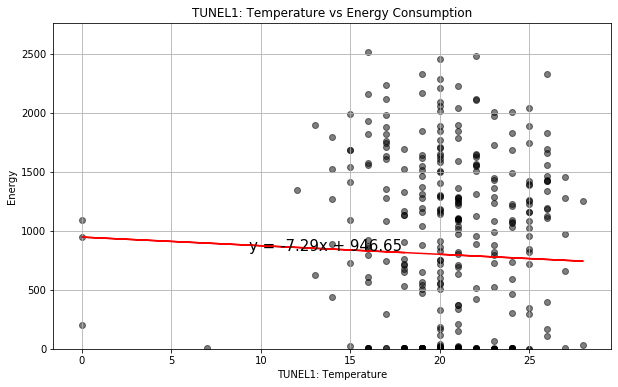

In [975]:
x_values = tun_data1["Temp"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL1: UV| 
    The correlation is 0.01
    The LinregressResult(slope=7.076898551109051, intercept=758.4291193176311, rvalue=0.008759140166950403, pvalue=0.8673683091048449, stderr=42.34617044698842)
    


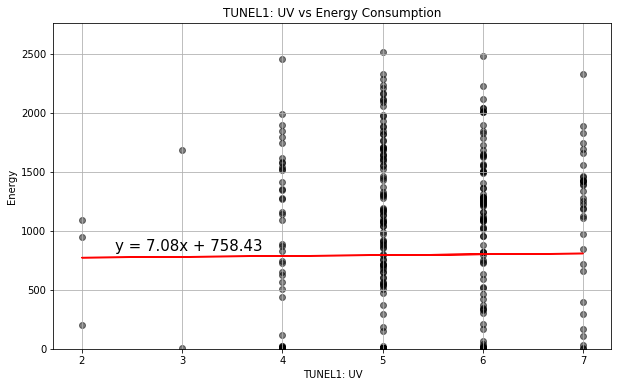

In [976]:
x_values = tun_data1["UV"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL1: Precipitation MM| 
    The correlation is -0.09
    The LinregressResult(slope=-15.155611892815212, intercept=826.1501103515191, rvalue=-0.09249312068831758, pvalue=0.07718892926674889, stderr=8.551605721997745)
    


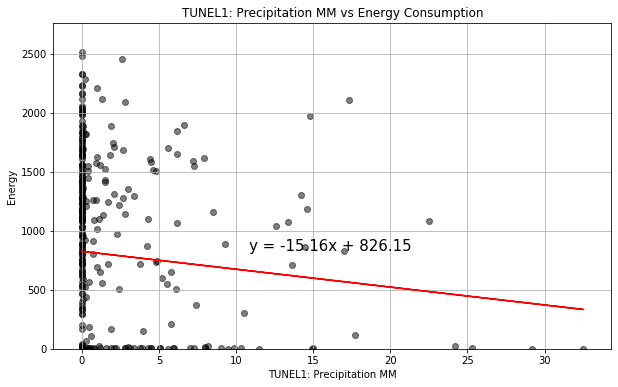

In [977]:
x_values = tun_data1["PrecMM"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL1: Humidity| 
    The correlation is 0.05
    The LinregressResult(slope=2.053479367100284, intercept=693.7732071976577, rvalue=0.05038972594372125, pvalue=0.33638854782891825, stderr=2.1332688424030066)
    


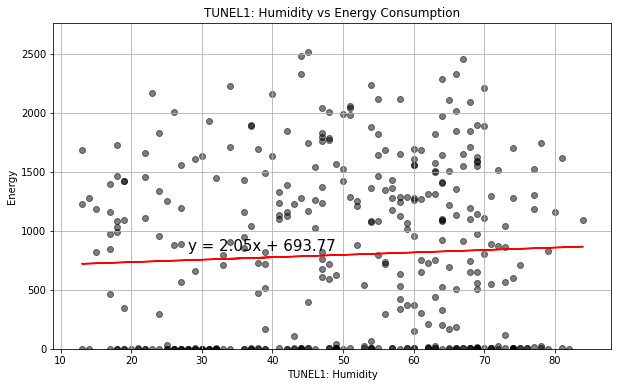

In [978]:
x_values = tun_data1["Hum"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL1: Heat| 
    The correlation is -0.07
    The LinregressResult(slope=-17.163010282505063, intercept=1149.747363679503, rvalue=-0.06689136711167429, pvalue=0.2016869451062747, stderr=13.418343428620254)
    


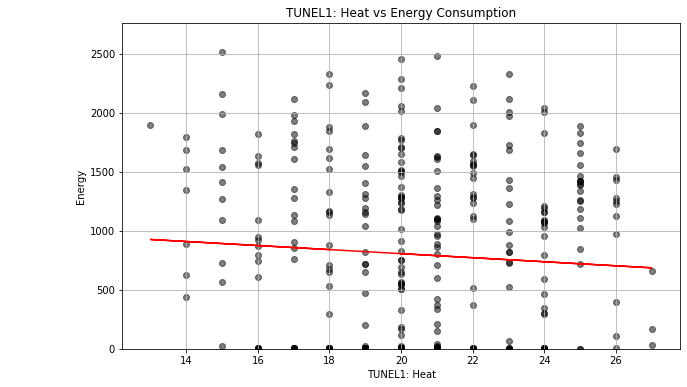

In [979]:
x_values = tun_data1["Heat"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL1: Dew Point| 
    The correlation is 0.06
    The LinregressResult(slope=7.215354020847294, intercept=743.7221495572177, rvalue=0.058453413321370586, pvalue=0.26467548725081363, stderr=6.458830046000244)
    


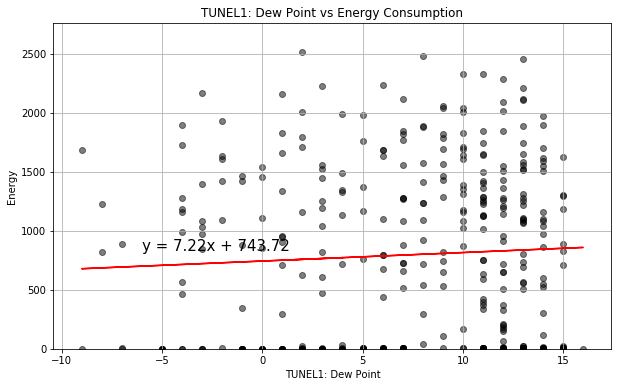

In [980]:
x_values = tun_data1["DP"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL1: Wind Chill| 
    The correlation is -0.08
    The LinregressResult(slope=-18.640631961249905, intercept=1174.5880934986697, rvalue=-0.07608214415990659, pvalue=0.14631695018046276, stderr=12.804616898482818)
    


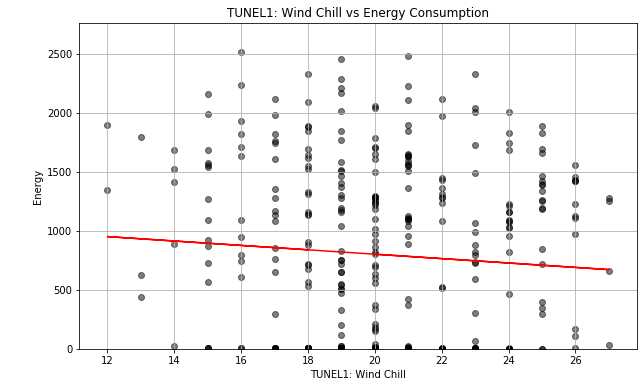

In [981]:
x_values = tun_data1["WChill"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL1: Feel Like| 
    The correlation is -0.08
    The LinregressResult(slope=-18.75658428298885, intercept=1177.2972365723367, rvalue=-0.07675640739952959, pvalue=0.14276374410238432, stderr=12.770423661804159)
    


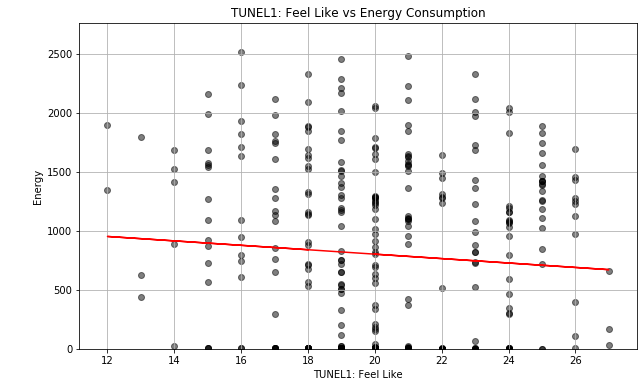

In [982]:
x_values = tun_data1["FLike"]
y_values = tun_data1["energy"]
x_label = "TUNEL1: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B1997F668>,
      dtype=object)

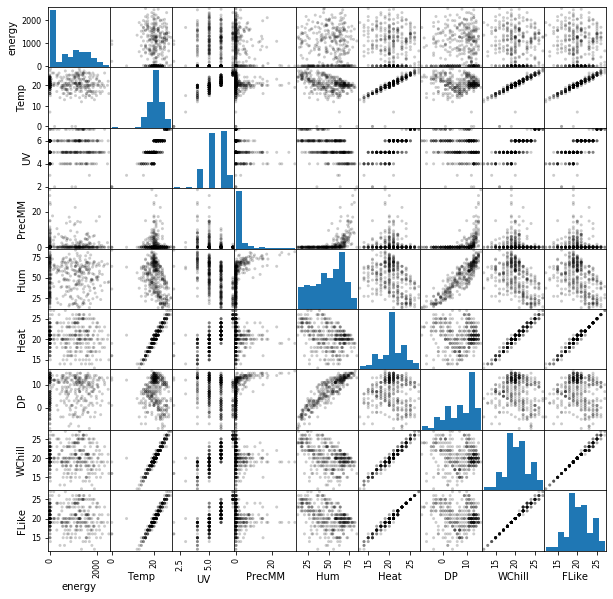

In [983]:
pd.plotting.scatter_matrix(tun_data1.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "black")

|Energy Consumption Vs TUNEL2: Temperature| 
    The correlation is -0.15
    The LinregressResult(slope=-56.12770557730491, intercept=3221.50462896908, rvalue=-0.1451642775371948, pvalue=0.005395698063161159, stderr=20.051278433221622)
    


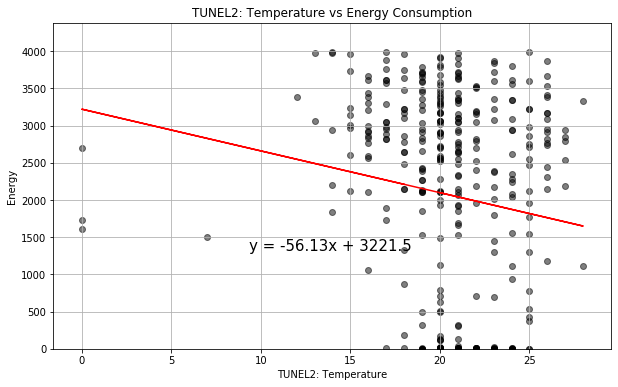

In [984]:
x_values = tun_data2["Temp"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL2: UV| 
    The correlation is -0.12
    The LinregressResult(slope=-190.5943301394922, intercept=3098.1975724216773, rvalue=-0.12478299903535729, pvalue=0.01692120119744046, stderr=79.43211202448316)
    


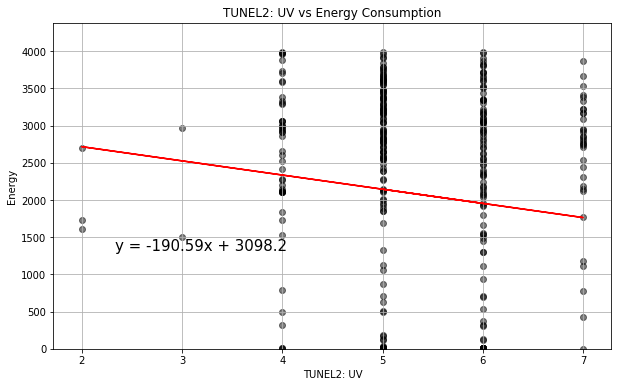

In [985]:
x_values = tun_data2["UV"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL2: Precipitation MM| 
    The correlation is -0.05
    The LinregressResult(slope=-16.54863411002365, intercept=2098.7133693217506, rvalue=-0.05342260327539729, pvalue=0.30807644525449346, stderr=16.213090091556975)
    


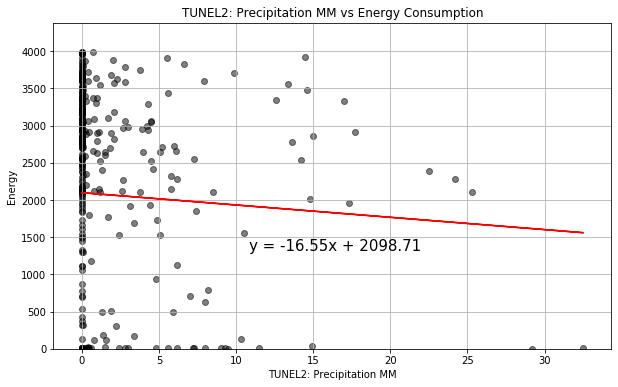

In [986]:
x_values = tun_data2["PrecMM"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL2: Humidity| 
    The correlation is 0.14
    The LinregressResult(slope=10.587137873312967, intercept=1535.760591220857, rvalue=0.1374222825351788, pvalue=0.008474634198127348, stderr=3.999730251454029)
    


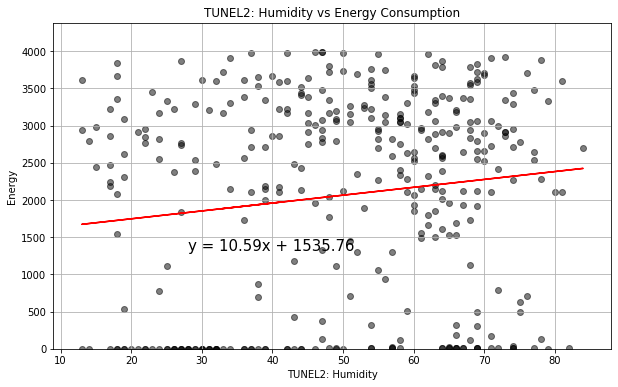

In [987]:
x_values = tun_data2["Hum"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL2: Heat| 
    The correlation is -0.18
    The LinregressResult(slope=-85.23951428207708, intercept=3819.8251557799895, rvalue=-0.1757294346369838, pvalue=0.0007335680752556673, stderr=25.02847300268488)
    


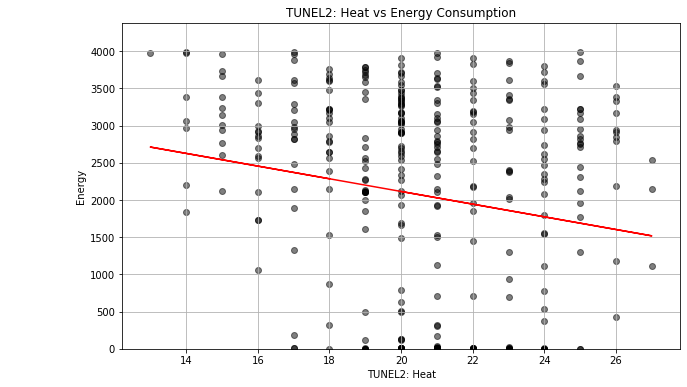

In [988]:
x_values = tun_data2["Heat"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL2: Dew Point| 
    The correlation is 0.11
    The LinregressResult(slope=24.94420141672882, intercept=1883.3278303016832, rvalue=0.10689287856807957, pvalue=0.04096884649022995, stderr=12.161151900400242)
    


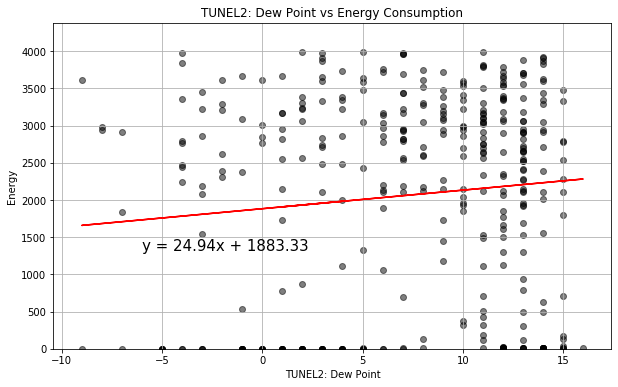

In [989]:
x_values = tun_data2["DP"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL2: Wind Chill| 
    The correlation is -0.2
    The LinregressResult(slope=-90.3743794492825, intercept=3898.525859656357, rvalue=-0.1951166702483397, pvalue=0.00017251518952924254, stderr=23.810684413863193)
    


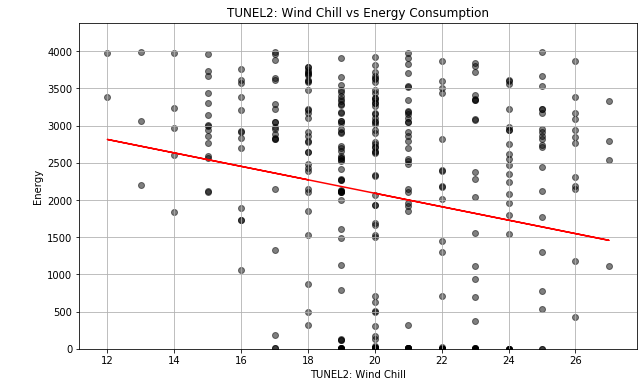

In [990]:
x_values = tun_data2["WChill"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL2: Feel Like| 
    The correlation is -0.2
    The LinregressResult(slope=-91.62210126617019, intercept=3925.5701297884693, rvalue=-0.19832984395007638, pvalue=0.00013383036413685805, stderr=23.732720880838468)
    


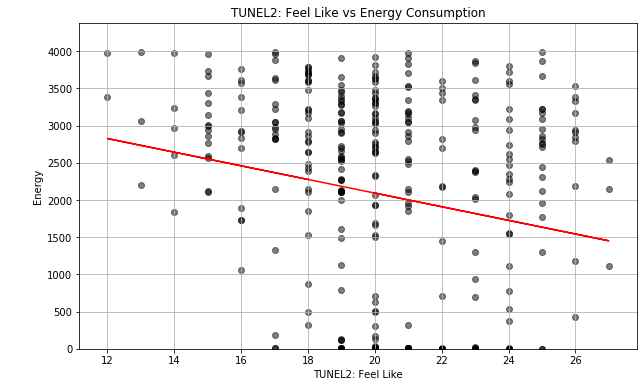

In [991]:
x_values = tun_data2["FLike"]
y_values = tun_data2["energy"]
x_label = "TUNEL2: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B1B5F2518>,
      dtype=object)

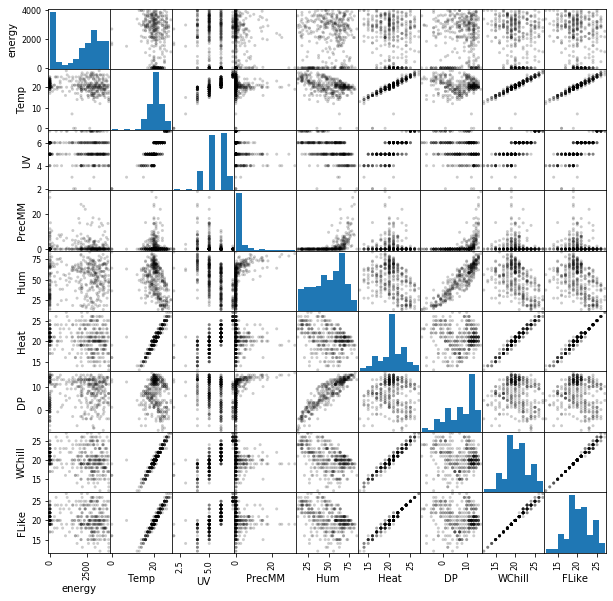

In [992]:
pd.plotting.scatter_matrix(tun_data2.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "black")

|Energy Consumption Vs TUNEL3: Temperature| 
    The correlation is 0.03
    The LinregressResult(slope=10.334984625249916, intercept=3063.0615294733407, rvalue=0.02975466035618634, pvalue=0.5704297941634195, stderr=18.197503499686338)
    


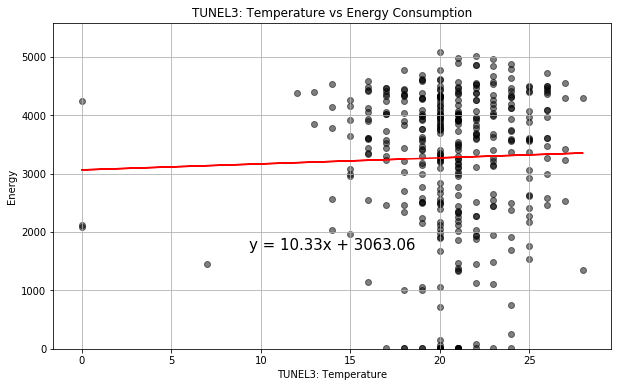

In [993]:
x_values = tun_data3["Temp"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: Temperature"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL3: UV| 
    The correlation is 0.07
    The LinregressResult(slope=99.30778385364727, intercept=2738.2092054260233, rvalue=0.07237547502395522, pvalue=0.16706364882208555, stderr=71.72998153367844)
    


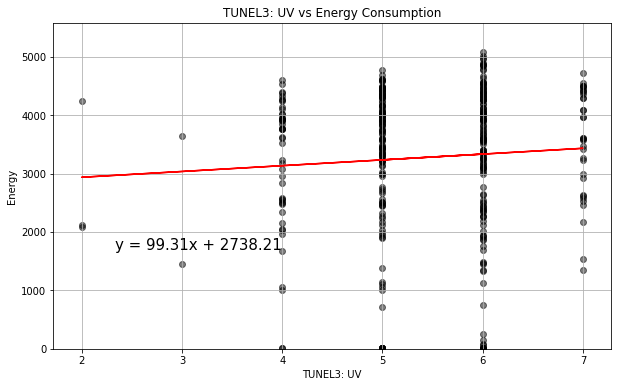

In [994]:
x_values = tun_data3["UV"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: UV"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL3: Precipitation MM| 
    The correlation is -0.22
    The LinregressResult(slope=-60.79879374222632, intercept=3393.728830804583, rvalue=-0.21848445914489903, pvalue=2.480055627426434e-05, stderr=14.233199171407458)
    


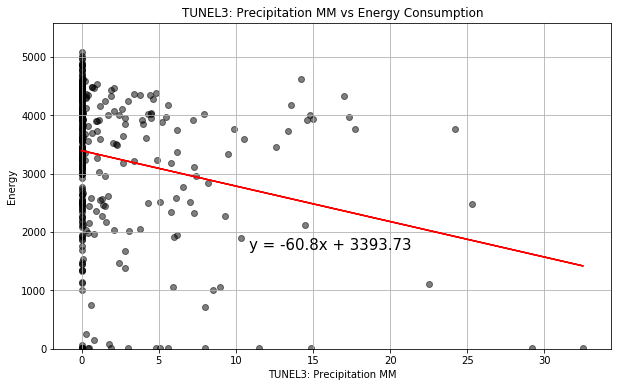

In [995]:
x_values = tun_data3["PrecMM"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: Precipitation MM"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL3: Humidity| 
    The correlation is -0.26
    The LinregressResult(slope=-18.029323147677875, intercept=4179.697808970045, rvalue=-0.26050778505007666, pvalue=4.3198837920701336e-07, stderr=3.5022536289961694)
    


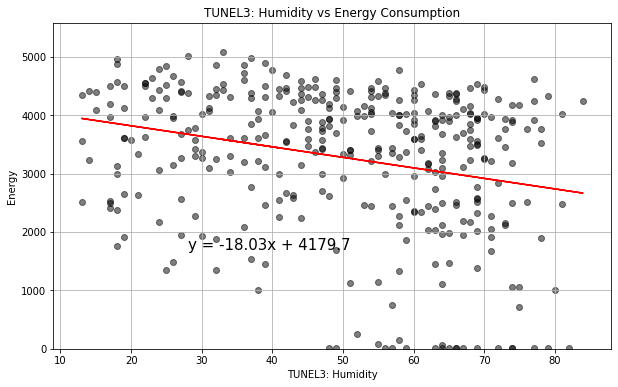

In [996]:
x_values = tun_data3["Hum"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: Humidity"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL3: Heat| 
    The correlation is -0.01
    The LinregressResult(slope=-5.14810301360865, intercept=3381.607127012147, rvalue=-0.011814448910377945, pvalue=0.8217782415241176, stderr=22.83772064788268)
    


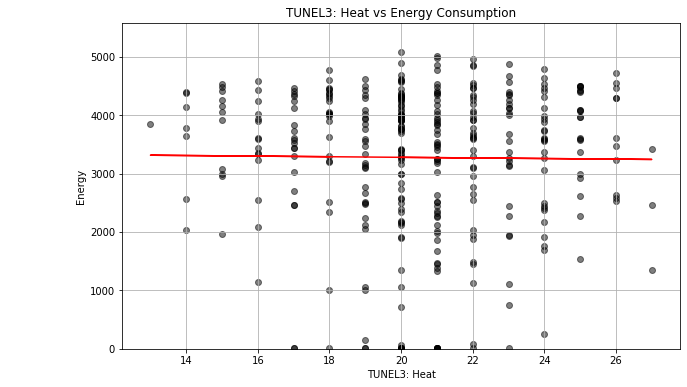

In [997]:
x_values = tun_data3["Heat"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: Heat"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL3: Dew Point| 
    The correlation is -0.27
    The LinregressResult(slope=-57.455009616846, intercept=3697.841010545625, rvalue=-0.27407521541983554, pvalue=9.941375757175519e-08, stderr=10.56697771770362)
    


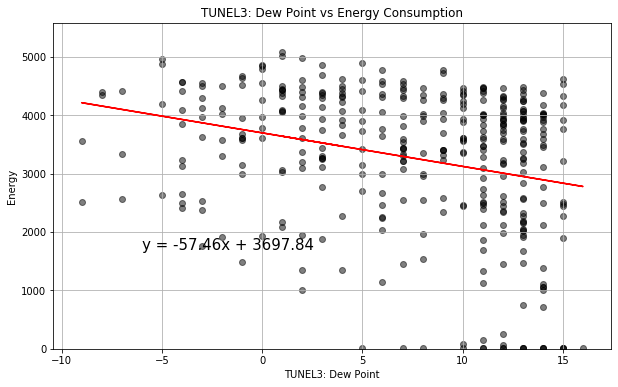

In [998]:
x_values = tun_data3["DP"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: Dew Point"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL3: Wind Chill| 
    The correlation is 0.02
    The LinregressResult(slope=6.93161374320875, intercept=3135.2121492872516, rvalue=0.016658891375091477, pvalue=0.750761655406956, stderr=21.806064640707227)
    


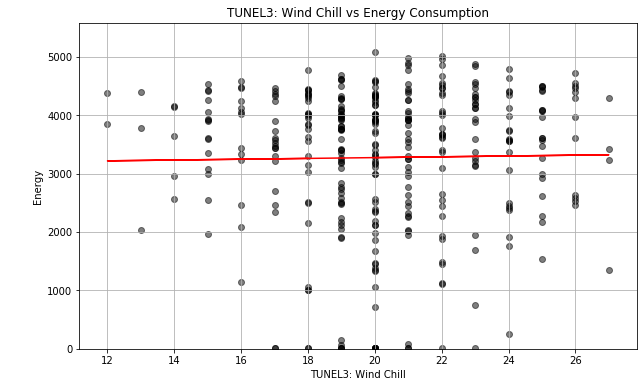

In [999]:
x_values = tun_data3["WChill"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: Wind Chill"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

|Energy Consumption Vs TUNEL3: Feel Like| 
    The correlation is 0.01
    The LinregressResult(slope=3.3951755876495646, intercept=3206.832554880093, rvalue=0.008181119880582174, pvalue=0.8760477887521717, stderr=21.751251843023482)
    


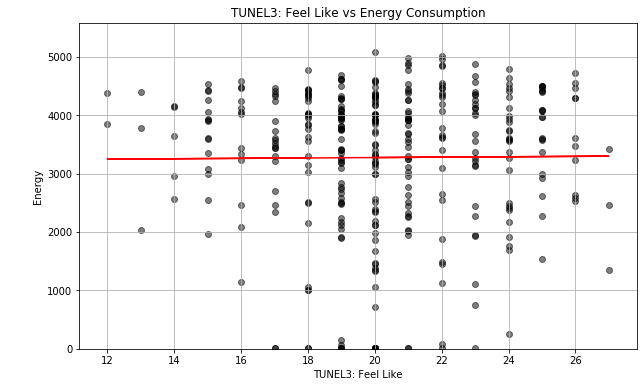

In [1000]:
x_values = tun_data3["FLike"]
y_values = tun_data3["energy"]
x_label = "TUNEL3: Feel Like"
y_label = "Energy Consumption"
scatter_plot(x_values,y_values,x_label,y_label)
plt.ylabel("Energy")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B1D28FD30>,
      dtype=object)

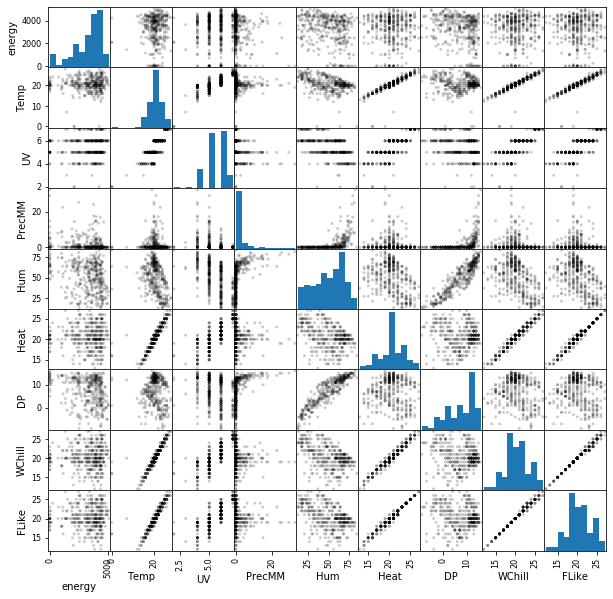

In [1001]:
pd.plotting.scatter_matrix(tun_data3.loc[:,"energy":"FLike"], alpha=0.2, figsize=(10,10), color= "black")

## How is it correlated the production and the energy consumption?

In [1002]:
# Luis

In [1003]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [1004]:
# Luis

## Define the energy consumption curve for each season of the year.

In [1005]:
# Lupita

## For each group of devices, rank them by cost.


In [1006]:
# Lupita

## Anual base line for each device.  

In [1007]:
# Daniel

## Make production recommendations, based on the optimal production. 

In [1008]:
# Daniel